# Cardiovascular Disease Risk Prediction
#### Fall 2023<br>CIS 5450: Big Data Analytics<br>University of Pennsylvania<br>Collaborators:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lynn Hu (lingyh@upenn.edu)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Jeh Vandrevala (jehv@wharton.upenn.edu)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Peter Akioyamen (peterai@seas.upenn.edu)

## Introduction & Data
The Behavioral Risk Factor Surveillance System (BRFSS) is a premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. The original dataset was preprocessed and cleaned, going from 304 unique variables to 19 that relate to lifestyle factors that contributed to an individual's risk of any form of Cardiovascular Disease. THe original dataset is associated with a peer-reviewed publication that can be found [here](https://eajournals.org/ejcsit/vol11-issue-3-2023/integrated-machine-learning-model-for-comprehensive-heart-disease-risk-assessment-based-on-multi-dimensional-health-factors/); the edited dataset used in this work is available on [Kaggle](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/data), containing 308,854 observations and 19 columns, 12 of which are categorical and 7 numerical.

In this project, we seek to accomplish two things. **In the first component**, we formulate a traditional classification problem: given lifestyle factors and medical information of an individual, we would like to develop a machine learning model that is performant in predicting whether an indvidual has heart disease. Further we would like to investigate, given a highly performant model can be developed, the explainability of the model and understand what features are most predictive. Many medical studies have asserted that a meaningful relationship between heart disease and depression exists, stating: "At least a quarter of cardiac patients suffer with depression, and adults with depression often develop heart disease.<sup>[[1](#cite_note-1)]</sup> **In the second component**, we would like to study the occurrence of the comorbidity between heart disease and depression and develop a model that can accurately predict the co-occurrence of the two in patients. 

[<a id="cite_note-1">1</a>]: Heart disease and depression: A two-way relationship. 2017. National Heart, Lung, and Blood Institute. https://www.nhlbi.nih.gov/news/2017/heart-disease-and-depression-two-way-relationship.

## Initial Setup

In [1]:
# setup & import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

CVD_df = pd.read_csv("./CVD_cleaned.csv")

In [2]:
# read raw data into pandas
print(f"The dataset has {CVD_df.shape[0]} rows and {CVD_df.shape[1]} columns")
CVD_df.head()

The dataset has 308854 rows and 19 columns


General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [3]:
# view a quick quantitative description of the data
CVD_df.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

## Exploratory Data Analysis (EDA)
**Complete before EDA:** EDA will useful for us in determining a number of facts about the data we are working in before conducting our more specific data analysis. We are trying to find any errors in our data, identify features that might be useful and broadly speaking, learn more about the data we are workign with. 

**Complete after EDA:** [High-level summary of EDA findings. What did we find from our EDA? What was interesting/surprising? Is there anything that we now know we need to adjust for in our analysis? How do our discoveries inform our modelling procedure?]

TODO: Between each visualization, please add a markdown cell that interprets the plot and the findings of it?

### Goals of EDA

The data encompasses measures that fall into three primary categories: demographic information (specifically, sex and age), which remains relatively stable and may influence lifestyles, but is not affected by it; Lifestyle measures, which may or may not correlate with the likelihood of heart disease; and healthy condition measures, such as BMI and the self-reported diseases. 


Given our objective of constructing accurate classifiers for heart disease prediction, as well as identifying potential risk factors for heart disease and the coexistence of heart disease and depression, our Exploratory Data Analysis (EDA) aims to visualize relationships within and between the aforementioned three types of measures in the dataset.


We initiate the analysis with univariate examination, plotting the distribution of each variable to gain insights into its characteristics. Subsequently, we proceed to bivariate analysis, exploring relationships between variables, with a particular focus on understanding the association between heart disease, depression (our target variables), and predictive features (i.e., demographics and lifestyles). Lastly, we investigate whether the association between diseases (e.g., heart disease, depression) and lifestyles varies by demographics, such as gender and age.

Detailed information about the methods employed and preliminary findings from the EDA are provided in each subsection. Additionally, a summary of key observations is presented at the conclusion of the EDA process.


In [4]:
CVD_df['Age_Ordered'] = pd.Categorical(CVD_df['Age_Category'], ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80+'])
CVD_df['General_Health_order'] =  pd.Categorical(CVD_df['General_Health'], ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
CVD_df['Diabetes_order'] = pd.Categorical(CVD_df['Diabetes'], ['No','No, pre-diabetes or borderline diabetes','Yes', 'Yes, but female told only during pregnancy'])
CVD_df['checkup_order'] =  pd.Categorical(CVD_df['Checkup'], ["Within the past year", 'Within the past 2 years',  "Within the past 5 years","5 or more years ago", "Never"])
CVD_df['Arthritis'] =  pd.Categorical(CVD_df['Arthritis'], ['No','Yes'])

### Univariate Analysis 

Health Condition and Disease

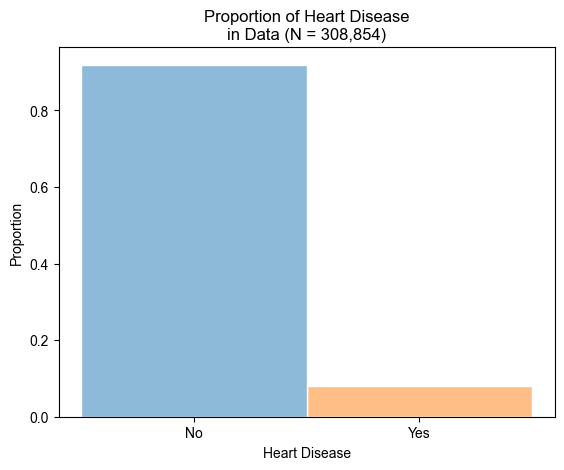

In [5]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, x="Heart_Disease", hue = "Heart_Disease", 
    stat="proportion")
plt.title("Proportion of Heart Disease\nin Data (N = 308,854)")
plt.xlabel("Heart Disease")
plt.ylabel("Proportion")
plt.legend([],[], frameon=False)
plt.show()

> The distribution of heart disease in the data is unbalanced. Less than 10% of the sample reported having heart disease. This means we need to employ strategies to improve the class imbalance for modelling. 

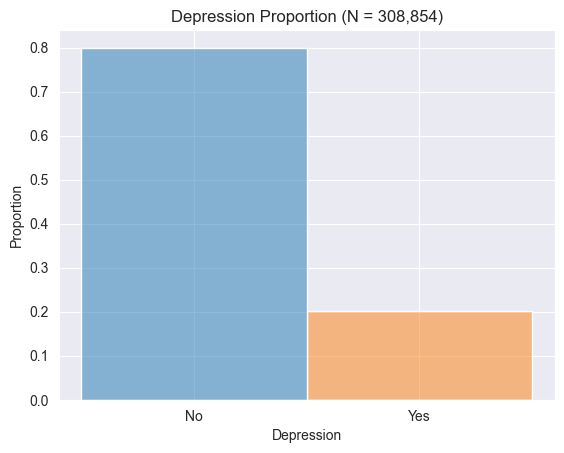

In [6]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, x="Depression",hue ="Depression", stat = "proportion")
plt.title("Depression Proportion (N = 308,854)")
plt.legend([],[], frameon=False)
plt.show()

> About 20% of our sample reported having depression, which is higher than the proportion of individuals having heart disease.

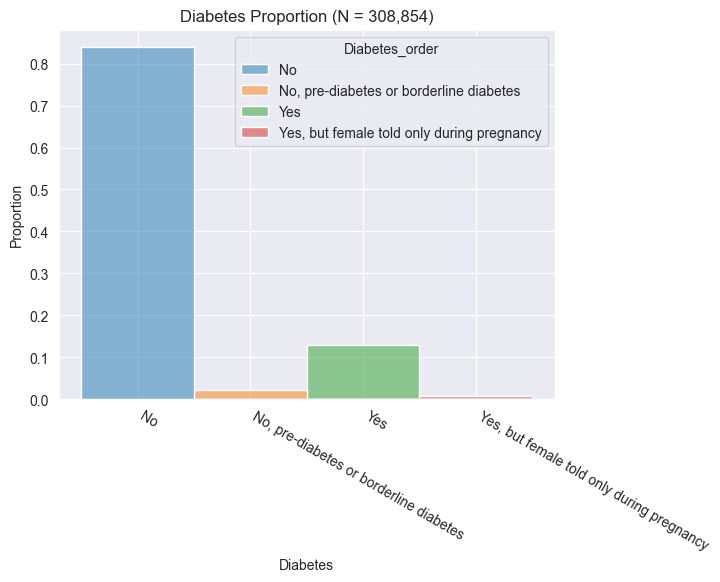

In [7]:

plt.plot(size = [8, 8])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, x="Diabetes_order", hue = "Diabetes_order", stat = "proportion")
plt.title("Diabetes Proportion (N = 308,854)")
plt.xticks(rotation = 330, ha = 'left')
plt.xlabel("Diabetes")
plt.show()

> There are four categories of Diabetes, but the pre/borderline diabetes and pregnancy diabetes only consists a small proportion. The meaning of these two underrepresented categories in terms of heart disease is also unclear, so we may consider simplifying this variable into a binary one.

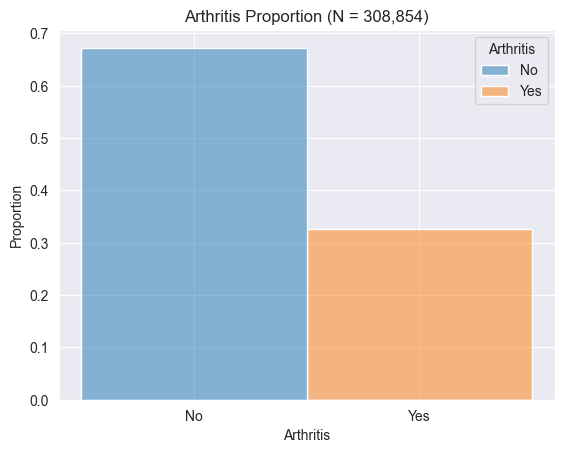

In [8]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, x="Arthritis", hue = "Arthritis", stat = "proportion")
plt.title("Arthritis Proportion (N = 308,854)")
plt.show()

> Over 30% of the sample reported having Arthritis. This is the most commonly reported disease in this data.  

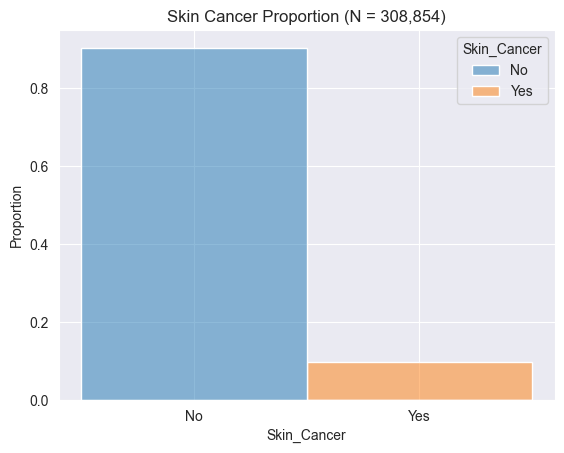

In [9]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, 
    x="Skin_Cancer", 
    hue ="Skin_Cancer",
    stat = "proportion")
plt.title("Skin Cancer Proportion (N = 308,854)")
plt.show()

> About 10% of the sample reported having skin cancer. 

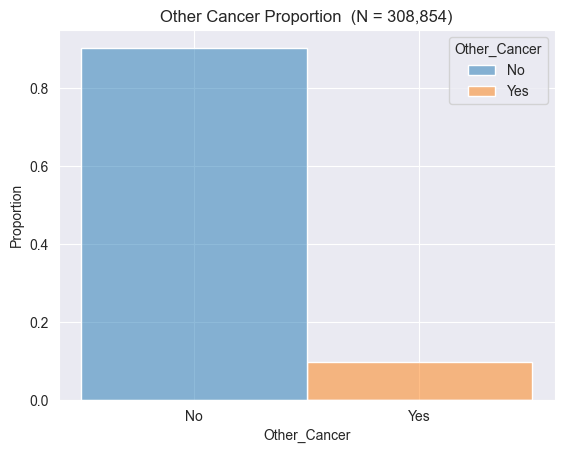

In [10]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, 
    x="Other_Cancer", 
    hue = "Other_Cancer",
    stat = "proportion")
plt.title("Other Cancer Proportion  (N = 308,854)")
plt.show()

> The proportion of individuals reporting having other cancer (non-skin cancer) is similar to the proportion of having skin cancer (~10%). 

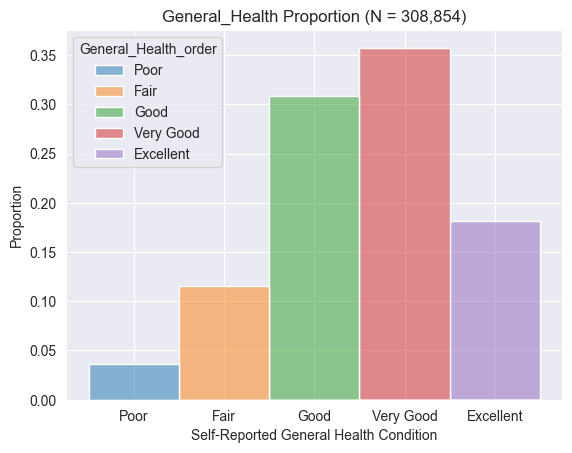

In [11]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, 
    x="General_Health_order", 
    hue = "General_Health_order",
    stat = "proportion")
plt.title("General_Health Proportion (N = 308,854)")
plt.xlabel("Self-Reported General Health Condition")
plt.show()

> The majority of the sample reported having at least good health condition. Only less than 5% of the sample reported having poor health conditions.

> Intermediate summary: There are more individuals who reported "no" than "yes" for each disease, including Heart Disease, our target variable. The proportion of individuals having heart disease is less than 10%. General Health within the population is primarily 'Good' or 'Very Good'. 

Demographics

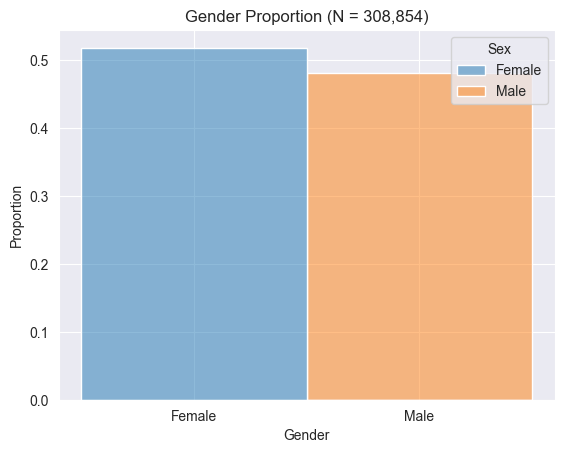

In [12]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, x="Sex",hue ="Sex", stat = "proportion")
plt.title("Gender Proportion (N = 308,854)")
plt.xlabel("Gender")
plt.show()

> The gender ratio of the sample is well enough balanced. 

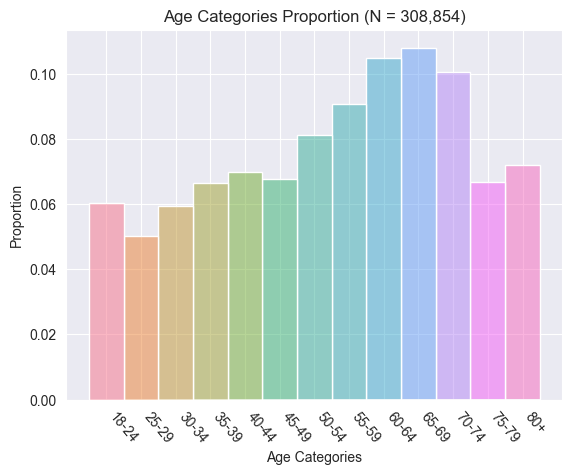

In [13]:
plt.plot(size = [6, 6])
sns.set_style("darkgrid")
sns.histplot(data=CVD_df, 
    x="Age_Ordered",
    hue ="Age_Ordered", 
    stat = "proportion",
    legend = False)
plt.title("Age Categories Proportion (N = 308,854)")
plt.xlabel('Age Categories')
plt.xticks(rotation = 310, ha = 'left')
plt.show()

> The proportion of individuals aged 50+ is higher than those younger than 50. People at older ages are at a higher risk of having heart disease (National Heart, Lung, and Blood Institute. ), so it is worth further examining the age breakdown of disease and lifestyle variables.

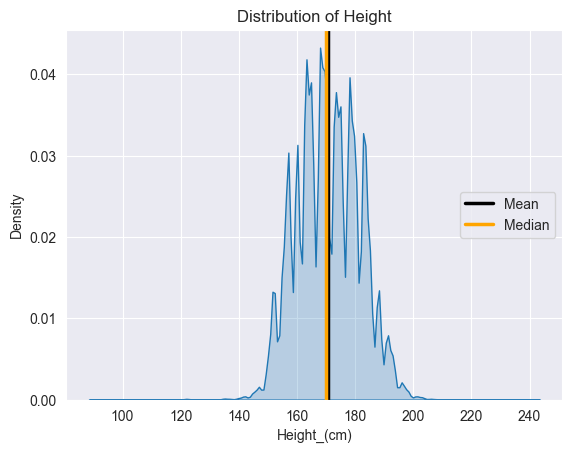

In [14]:
legend_elements = [Line2D([0], [0], color='black', lw=2.5, label='Mean'),
                   Line2D([0], [0], color='orange', lw = 2.5, label='Median',
                          markerfacecolor='g', markersize=15)]

fig, ax = plt.subplots()
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Height_(cm)",
    fill=True
)
plt.title("Distribution of Height")
plt.axvline(CVD_df['Height_(cm)'].mean(), c='k', ls='-', lw=2.5)
plt.axvline(CVD_df['Height_(cm)'].median(), c='orange', ls='-', lw=2.5)

ax.legend(handles=legend_elements, loc='right')

plt.show()

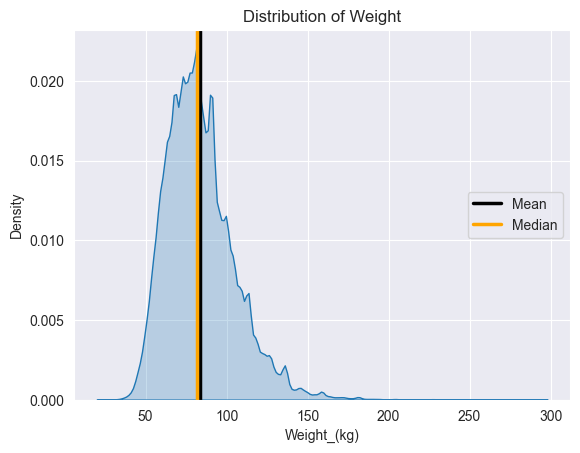

In [15]:
legend_elements = [Line2D([0], [0], color='black', lw=2.5, label='Mean'),
                   Line2D([0], [0], color='orange', lw = 2.5, label='Median',
                          markerfacecolor='g', markersize=15)]

fig, ax = plt.subplots()
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Weight_(kg)",
    fill=True
)
plt.title("Distribution of Weight")
plt.axvline(CVD_df['Weight_(kg)'].mean(), c='k', ls='-', lw=2.5)
plt.axvline(CVD_df['Weight_(kg)'].median(), c='orange', ls='-', lw=2.5)

ax.legend(handles=legend_elements, loc='right')

plt.show()

> Our sample's height distribution looks normal, but the weight distribution is right skewed. Transformation may be needed. 

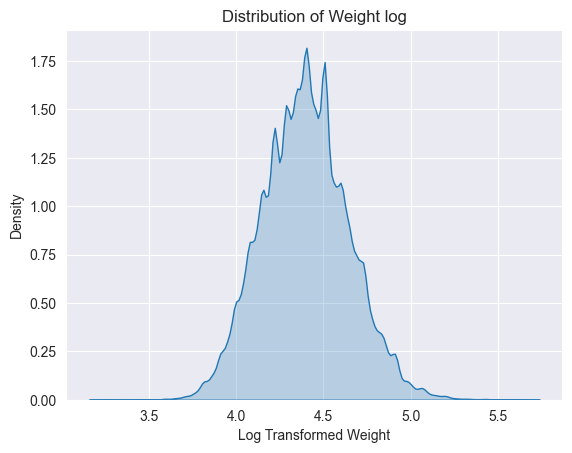

In [16]:
weight_log = np.log(CVD_df['Weight_(kg)'])

fig, ax = plt.subplots()
sns.set_style("darkgrid")
sns.kdeplot(
    x=weight_log,
    fill=True
)
plt.title("Distribution of Weight log")
plt.xlabel("Log Transformed Weight")
plt.show();

> The log transformation corrected the skewness well for weight measure in the data. 

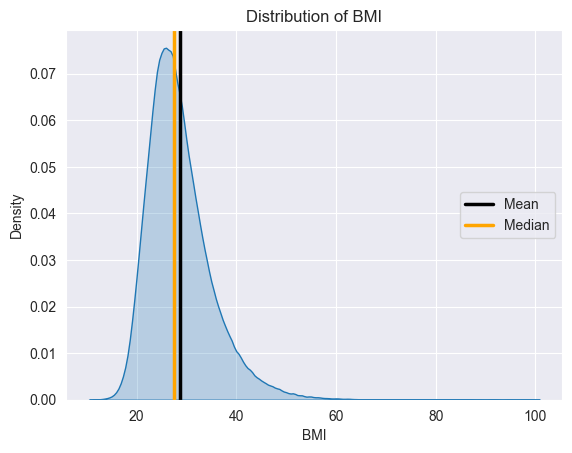

In [17]:
legend_elements = [Line2D([0], [0], color='black', lw=2.5, label='Mean'),
                   Line2D([0], [0], color='orange', lw = 2.5, label='Median',
                          markerfacecolor='g', markersize=15)]

fig, ax = plt.subplots()
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="BMI",
    fill=True
)
plt.title("Distribution of BMI")
plt.axvline(CVD_df['BMI'].mean(), c='k', ls='-', lw=2.5)
plt.axvline(CVD_df['BMI'].median(), c='orange', ls='-', lw=2.5)



# Create the figure

ax.legend(handles=legend_elements, loc='right')

plt.show()

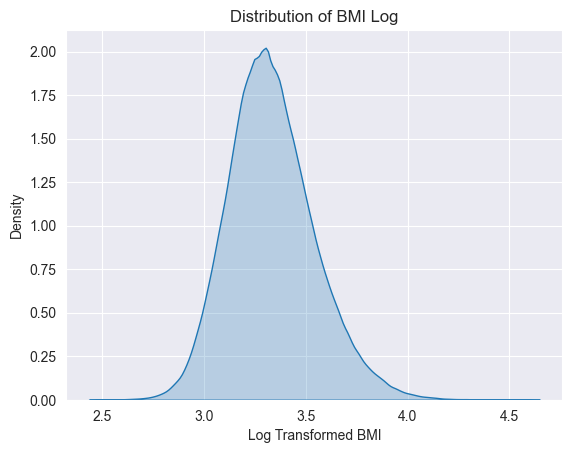

In [18]:
BMI_log = np.log(CVD_df['BMI'])
sns.set_style("darkgrid")
sns.kdeplot(
    x=BMI_log,
    fill=True
)
plt.title("Distribution of BMI Log")
plt.xlabel("Log Transformed BMI")
plt.show();

> Given the right skewness of BMI, we did a log transformation and the plot shows the transformation corrected the skewness. 

> Intermediate summary: The gender ratio is well-balanced, but we have slightly more middle-aged and elderly individuals than younger ones in the data. The distribution of BMI and weight are right-skewed, and log transformation helped correct the skewness. 

Lifestyle

> The majority of the sample had a doctor visit in the past one or two years, and most of the sample also engaged in some exercises in the past month. About 40% of the individuals had smoking history. 

> The distributions of alcohol consumption and healthy/unhealthy food consumption are right skewed, suggesting most people consumption these items at low-frequency levels. Log transformation doesn't make the distribution of these variables normal, so we will consider encoding the data in other ways. More details on these variables is contained in the appendix. 

### Bivariate Analysis

Demographics and Lifestyle: The relationships between demographic data and lifestyle data within the sample are showed within the appendix. Please review the appendix for further information on the relationships between these variables. 

Demographics and Health

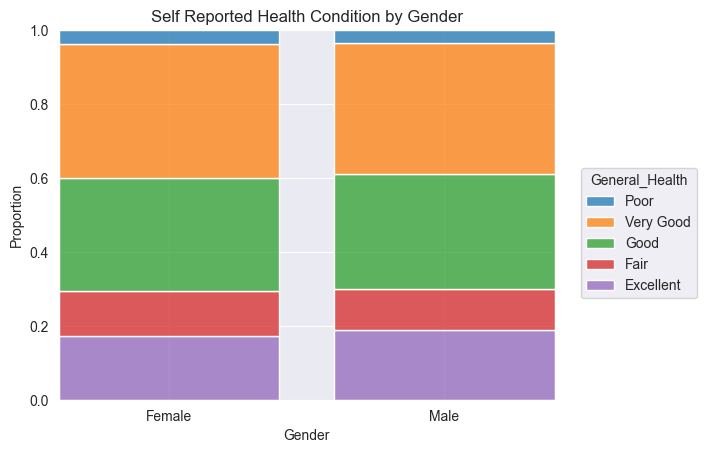

In [19]:
sns.set_style("darkgrid")
ax = sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "General_Health",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
sns.move_legend(ax, "right", bbox_to_anchor=(1.3, .45))
plt.title("Self Reported Health Condition by Gender")
plt.xlabel("Gender")
plt.show()

> Self-reported general health distributed similarly for both genders.

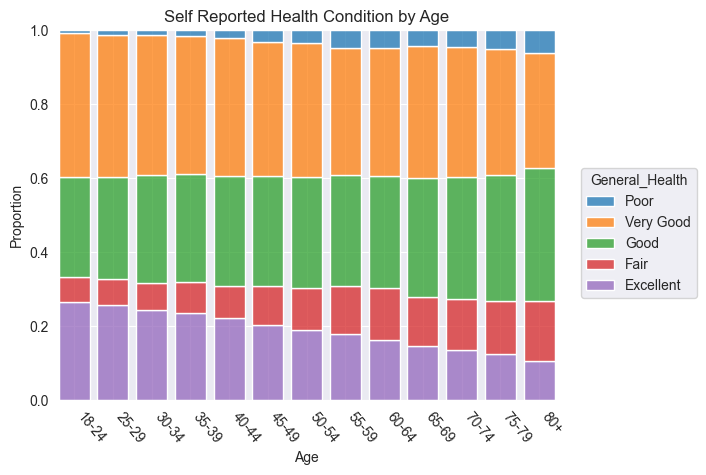

In [20]:
sns.set_style("darkgrid")
ax = sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "General_Health",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
sns.move_legend(ax, "right", bbox_to_anchor=(1.3, .45))
plt.xticks(rotation = 310, ha = 'left')
plt.title("Self Reported Health Condition by Age")
plt.xlabel("Age")
plt.show()

> Self-reported general health decreases as age increases

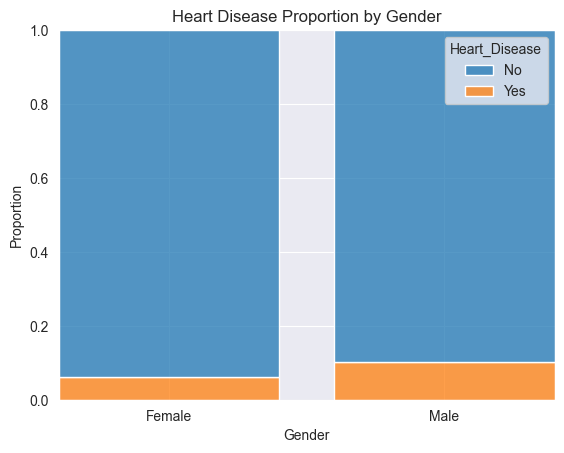

In [21]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Heart_Disease",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Heart Disease Proportion by Gender")
plt.xlabel("Gender")
plt.show()

> The proportion of heart disease patients is higher in males than females. 

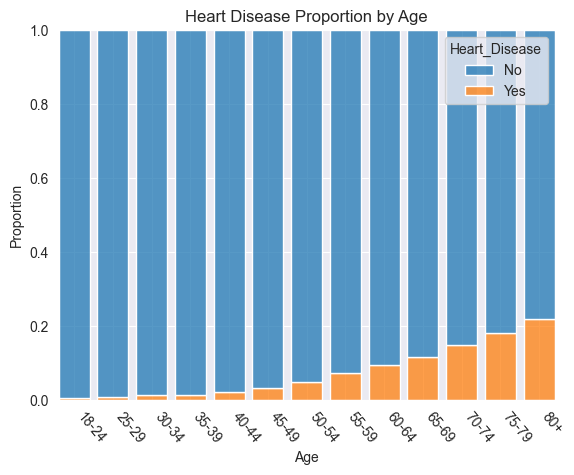

In [22]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Heart_Disease",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Heart Disease Proportion by Age")
plt.xlabel("Age")
plt.show()

> The proportion of heart disease patients rises as age increases.

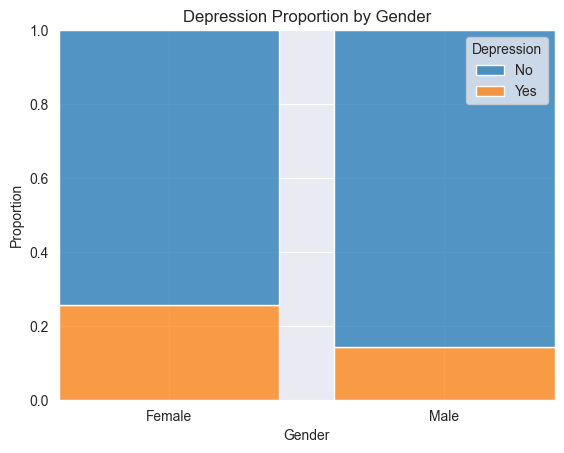

In [23]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Depression",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Depression Proportion by Gender")
plt.xlabel("Gender")
plt.show()

> Females in the sample have higher proportion of depression than males.

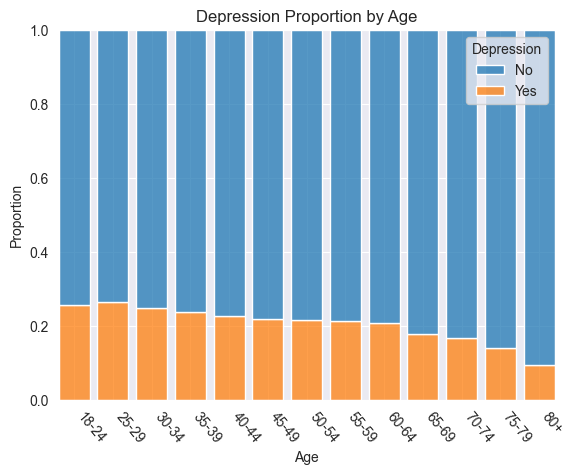

In [24]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Depression",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Depression Proportion by Age")
plt.xlabel("Age")
plt.show()

> Proportion of depression decreases with age. 

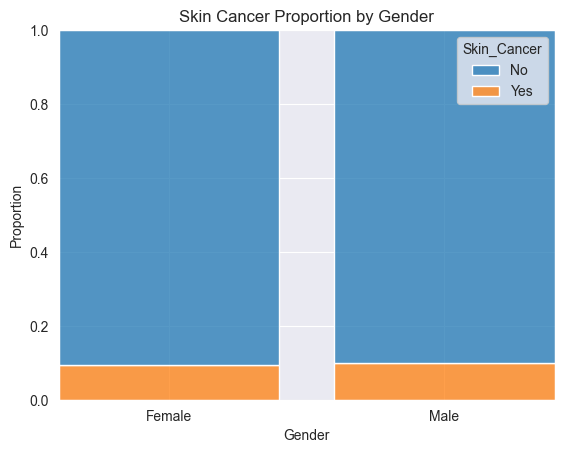

In [25]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Skin_Cancer",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Skin Cancer Proportion by Gender")
plt.xlabel("Gender")
plt.show()

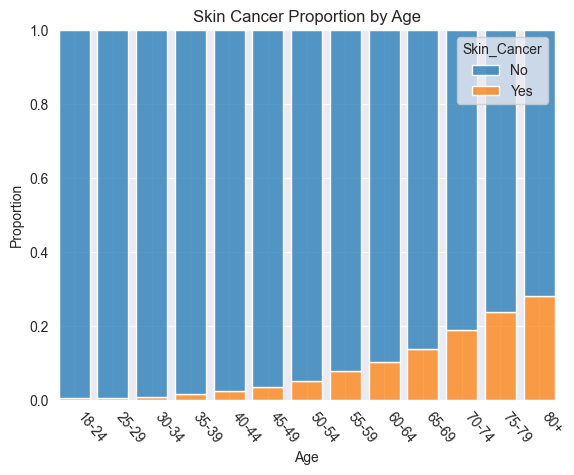

In [26]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Skin_Cancer",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Skin Cancer Proportion by Age")
plt.xlabel("Age")
plt.show()

> The distribution of skin cancer patients look similar for both genders, but increases fast with age.

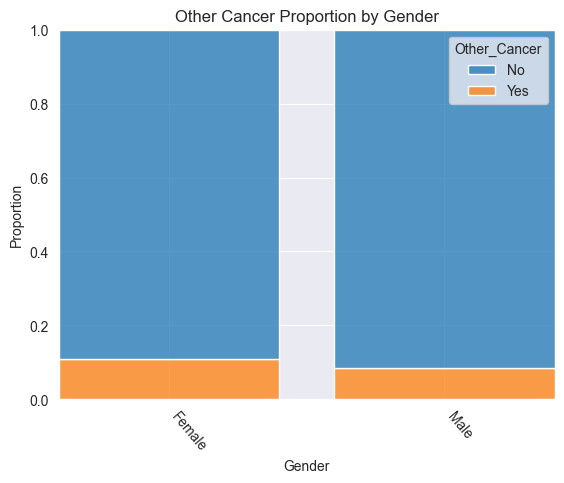

In [27]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Other_Cancer",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Other Cancer Proportion by Gender")
plt.xlabel("Gender")
plt.show()

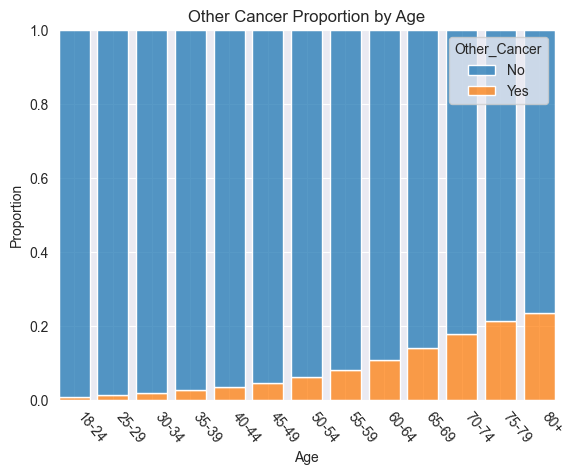

In [28]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Other_Cancer",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Other Cancer Proportion by Age")
plt.xlabel("Age")
plt.show()

> The proportion of non-skin cancer is higher in females and older people than males and younger ones. 

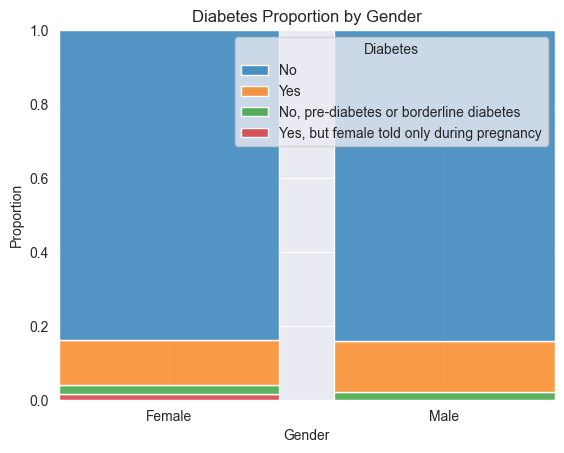

In [29]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Diabetes",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Diabetes Proportion by Gender")
plt.xlabel("Gender")
plt.show()

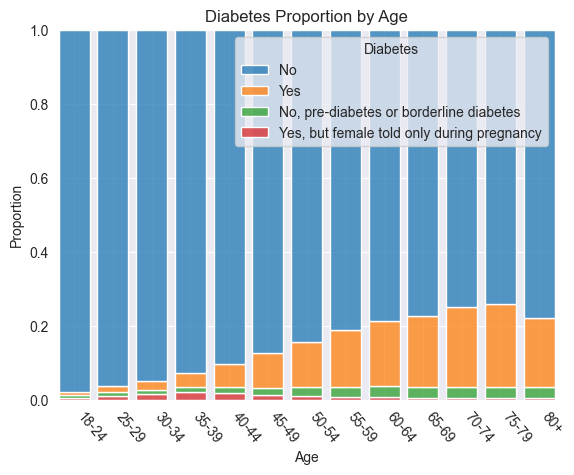

In [30]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Diabetes",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Diabetes Proportion by Age")
plt.xlabel("Age")
plt.show()

> Diabetes proportion is similar for both genders, increases with age but drop at age 80+. 

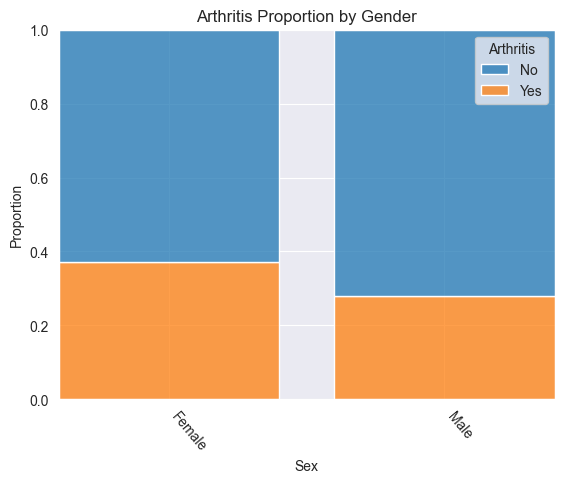

In [31]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Arthritis",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Arthritis Proportion by Gender")
plt.show()

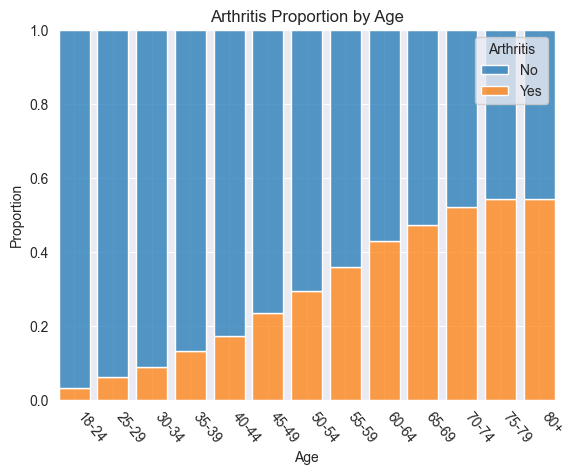

In [32]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Arthritis",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Arthritis Proportion by Age")
plt.xlabel("Age")
plt.show()

> Females have a higher proportion of arthritis, so as do older people.

> Intermediate summary: General health condition decreases with age, while the proportions of patients for each disease increase except depression. Males in this sample have a higher proportion of heart disease patients, but females seem to be more likely to get depression and arthritis.

BMI, Demographics, and Disease

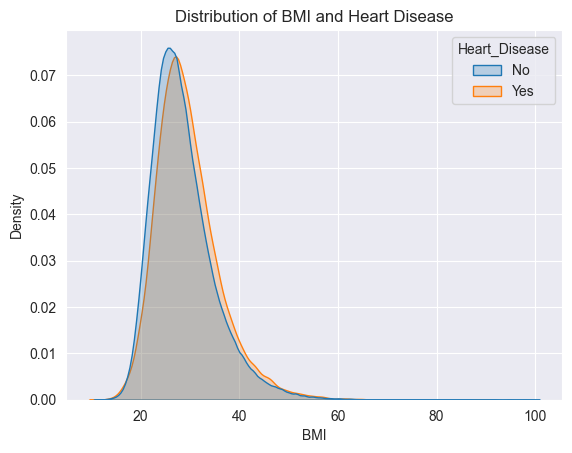

In [33]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="BMI",
    hue="Heart_Disease",
    fill=True,
    common_norm = False
)
plt.title("Distribution of BMI and Heart Disease")
plt.show()

> Those having heart disease have slightly higher BMI.

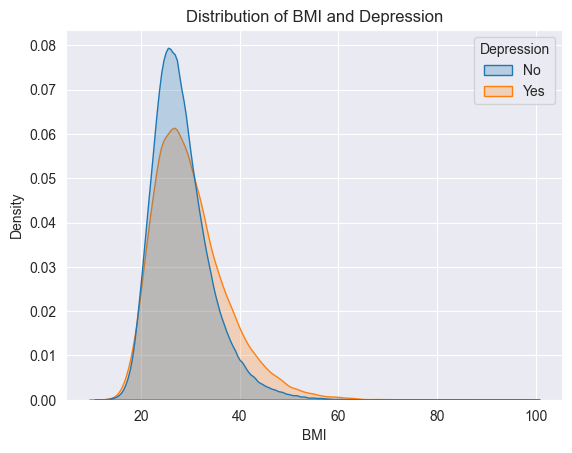

In [34]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="BMI",
    hue="Depression",
    fill=True,
    common_norm = False
)
plt.title("Distribution of BMI and Depression")
plt.show()

> Those having depression have slightly higher BMI.

Lifestyle, HD, and Depression

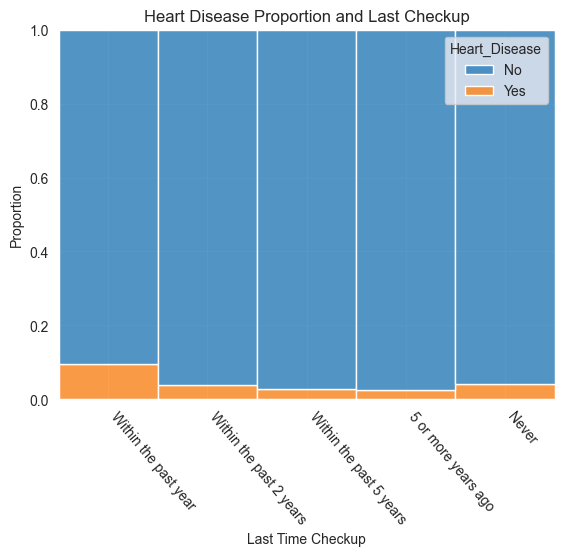

In [35]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "checkup_order", 
    hue = "Heart_Disease",
    multiple="fill", stat="proportion")
plt.xticks(rotation = 310, ha = 'left')
plt.title("Heart Disease Proportion and Last Checkup")
plt.xlabel("Last Time Checkup")
plt.show()

> The proportion of heart disease patients is highest in the category of having a check up within the past year. This may suggest that a recent checkup allows people to discover their heart disease. 

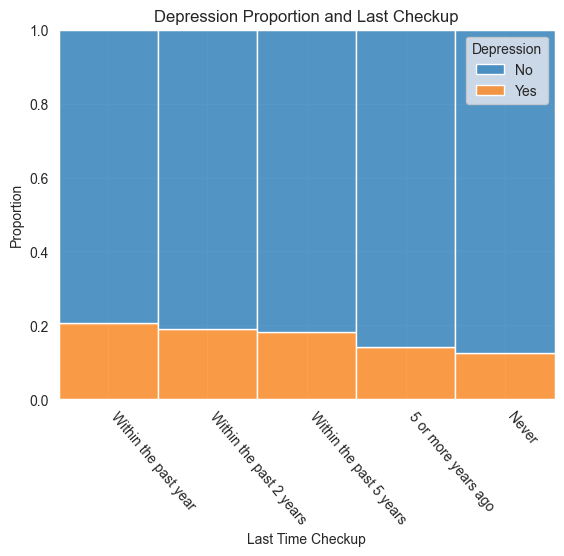

In [36]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "checkup_order", 
    hue = "Depression",
    multiple="fill", stat="proportion")
plt.xticks(rotation = 310, ha = 'left')
plt.title("Depression Proportion and Last Checkup")
plt.xlabel("Last Time Checkup")
plt.show()

> Proportion of depression patients is also higher in those had more recent chekcups with doctors.

> Having a doctor's visit in the past 1 or 2 years seem to have higher proportion of having heart disease. This should not be interpreted as having more frequent checkup lead to higher risk of heart disease. It may be related the higher proportion of elderly people in the data, or the relation is that checkup recently had individuals diagnosed. 

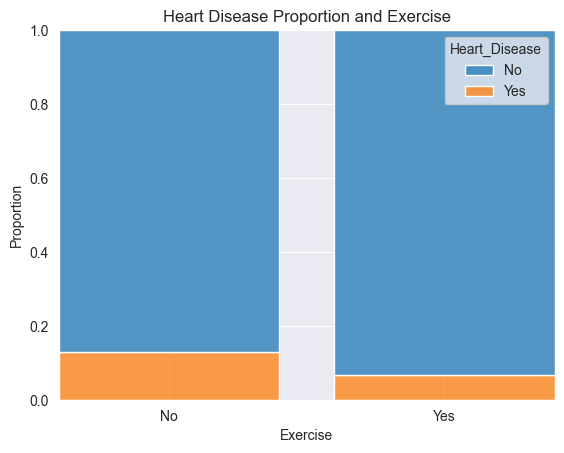

In [37]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Exercise", 
    hue = "Heart_Disease",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title('Heart Disease Proportion and Exercise')
plt.show()

> A higher proportion of heart disease patients is seen in those who reported no exercise outside of work in the past month.

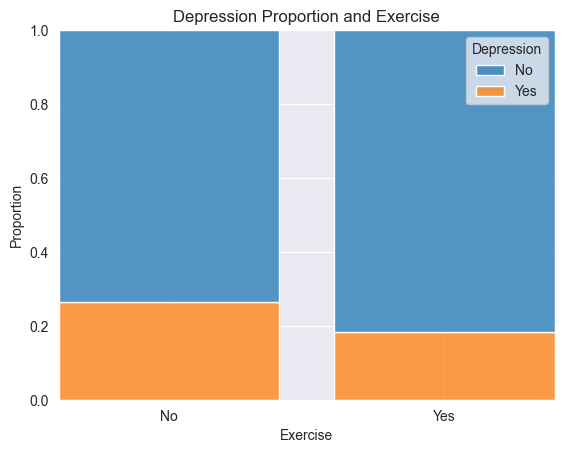

In [38]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Exercise", 
    hue = "Depression",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title('Depression Proportion and Exercise')
plt.show()

> Higher proportion of heart disease patients is seen in those who reported no exercise outside of work in the past month.

> Engaging in exercise seem to be positively related to lower proportion of having heart disease; The same pattern was observed with depression.

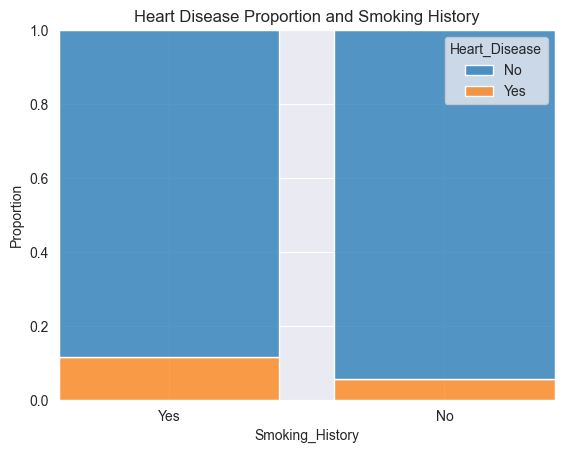

In [39]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Smoking_History", 
    hue = "Heart_Disease",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Heart Disease Proportion and Smoking History")
plt.show()

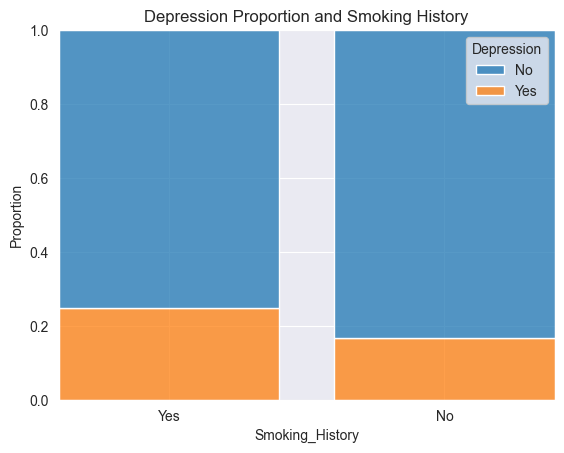

In [40]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Smoking_History", 
    hue = "Depression",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Depression Proportion and Smoking History")
plt.show()

> Having smoking history is related to a higher proportion of heart disease and/or depression. 

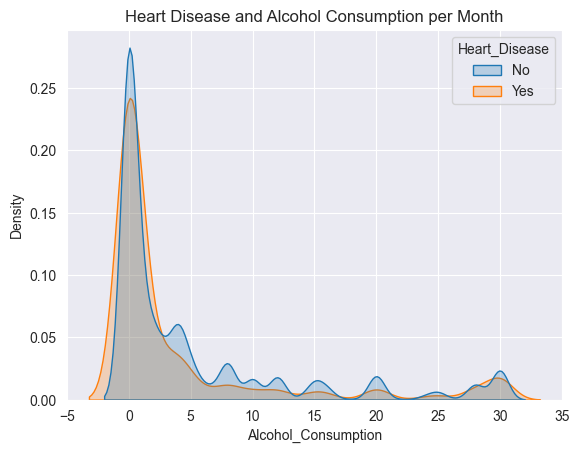

In [41]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Alcohol_Consumption",
    hue = "Heart_Disease",
    fill=True,
    common_norm = False
)
plt.title("Heart Disease and Alcohol Consumption per Month")
plt.show()

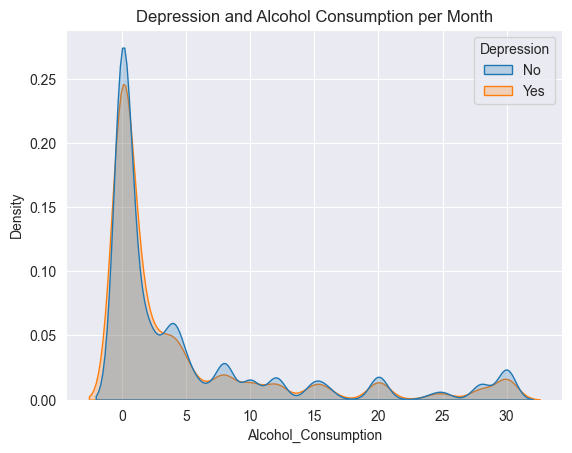

In [42]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Alcohol_Consumption",
    hue = "Depression",
    fill=True,
    common_norm = False
)
plt.title("Depression and Alcohol Consumption per Month")
plt.show()

> Those who have no heart disease seem to drink less per month compared to those having heart disease. There is a similar pattern for depression, but the difference between having vs. not having depression is smaller compared to the difference between having heart disease or not. 

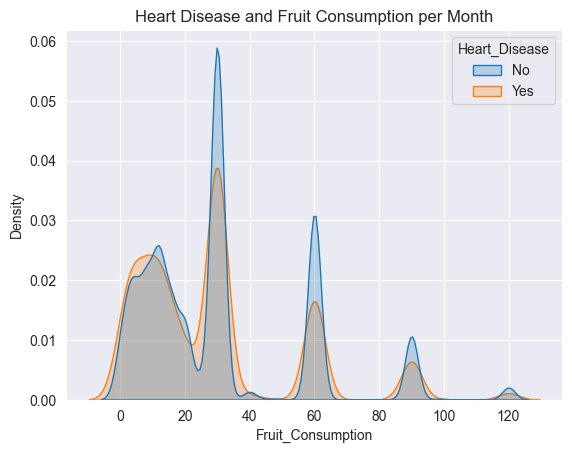

In [43]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Fruit_Consumption",
    hue = "Heart_Disease",
    fill=True,
    common_norm = False
)
plt.title("Heart Disease and Fruit Consumption per Month")
plt.show()

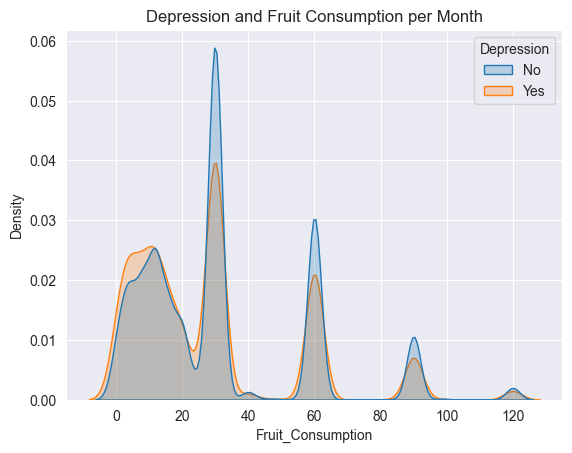

In [44]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Fruit_Consumption",
    hue = "Depression",
    fill=True,
    common_norm = False
)
plt.title("Depression and Fruit Consumption per Month")
plt.show()

> Higher consumption of fruit seem to be related to a lower incidence of heart disease and/or depression. 

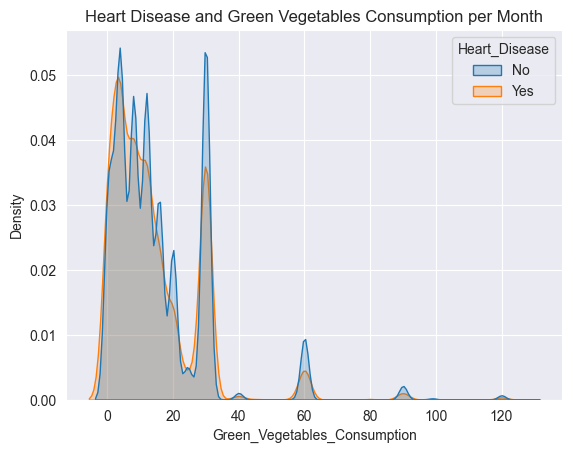

In [45]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Green_Vegetables_Consumption",
    hue = "Heart_Disease",
    fill=True,
    common_norm = False
)
plt.title("Heart Disease and Green Vegetables Consumption per Month")
plt.show()

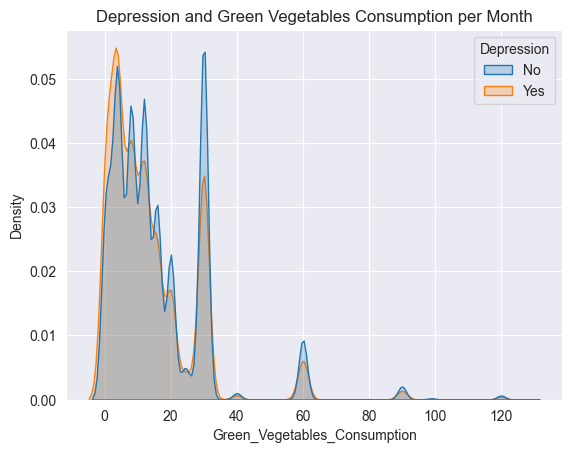

In [46]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Green_Vegetables_Consumption",
    hue = "Depression",
    fill=True,
    common_norm = False
)
plt.title("Depression and Green Vegetables Consumption per Month")
plt.show()

> Similar to fruit consumption, higher consumption of green vegetables seems to be related to lower heart disease and/or depression.

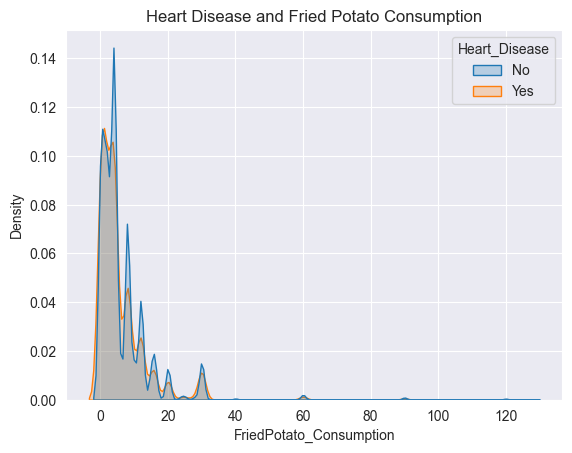

In [47]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="FriedPotato_Consumption",
    hue = "Heart_Disease",
    fill=True,
    common_norm = False
)
plt.title("Heart Disease and Fried Potato Consumption")
plt.show()

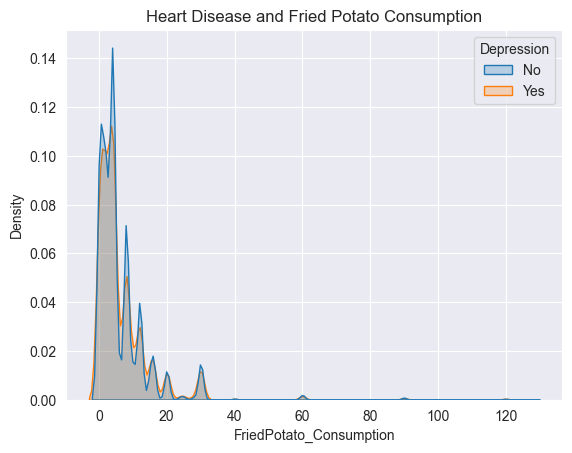

In [48]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="FriedPotato_Consumption",
    hue = "Depression",
    fill=True,
    common_norm = False
)
plt.title("Heart Disease and Fried Potato Consumption")
plt.show()

> There doesn't seem to be much of an association between fried potato consumption and the incidence of heart disease and depression. 

Association between Diseases

In [49]:
CVD_disease = CVD_df[['Heart_Disease', 'Depression', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']]
CVD_disease = CVD_disease.replace({'Yes': 1, 'No': 0})
CVD_disease['Diabetes'] = CVD_disease['Diabetes'].replace({"No, pre-diabetes or borderline diabetes":0, 
    "Yes, but female told only during pregnancy": 1})

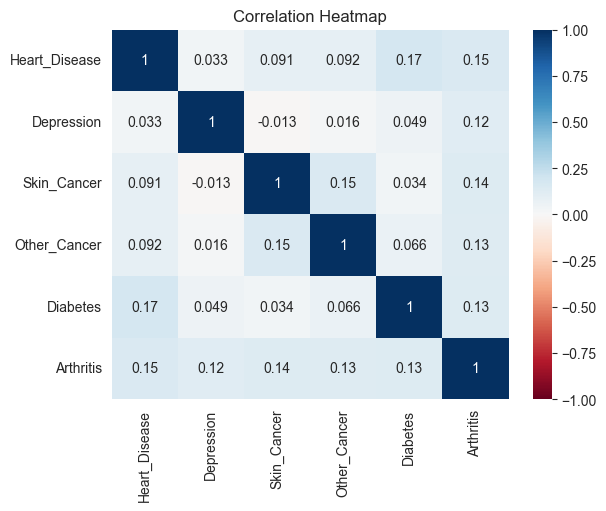

In [50]:
corr_spearman = CVD_disease.corr(method = 'spearman')

sns.heatmap(corr_spearman, annot = True,
    cmap = 'RdBu',
    vmin = -1, vmax = 1)

plt.title('Correlation Heatmap')
plt.show()

> Diseases are positively correlated with each other, so having one disease may be more likely to have another disease. However, heart disease is just weakly correlated with depression and cancers, but moderately correlated with diabetes and arthritis. Arthritis seem to be correlated moderately with all other diseases. 

Correlation between numerical features 

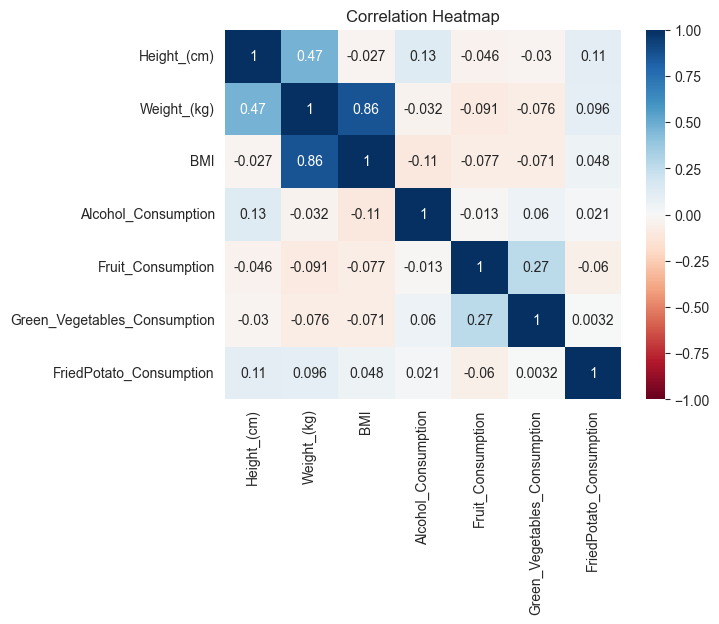

In [51]:
num_df = CVD_df[['Height_(cm)','Weight_(kg)', 'BMI',"Alcohol_Consumption",'Fruit_Consumption',	"Green_Vegetables_Consumption","FriedPotato_Consumption"]]

corr_mat_num = num_df.corr()
#matrix = np.triu(corr_mat_num)

plt.plot(size = [8, 8])
sns.heatmap(corr_mat_num,
    annot=True, cmap = 'RdBu',
    vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

> Correlations among numerical features are, in general, weak.

> BMI strongly correlated with Height and Weight. This is reasonable, given BMI is calculated based on height and weight. Our prediction model should tell us which of these three are the best predictor of heart disease. 

> Fruit and vegetable consumption are moderately correlated, and fried potato consumption is negatively (and weakly) related to fruit consumption.

### Multivariate Analysis

Heart Disease, Gender and Age

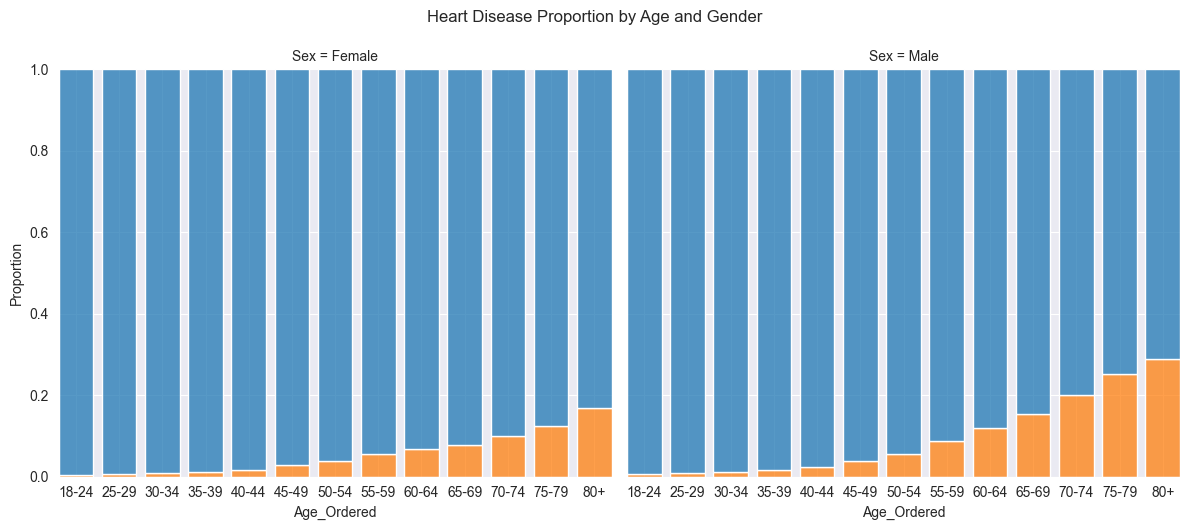

In [52]:
#facet plot by sex to show the change of distribution of patient for each age group

g = sns.FacetGrid(CVD_df, col = 'Sex', height=5, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Age_Ordered", 
    hue = "Heart_Disease",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))

g.fig.suptitle('Heart Disease Proportion by Age and Gender',y = 1.05)
plt.show()

Depression, gender, age

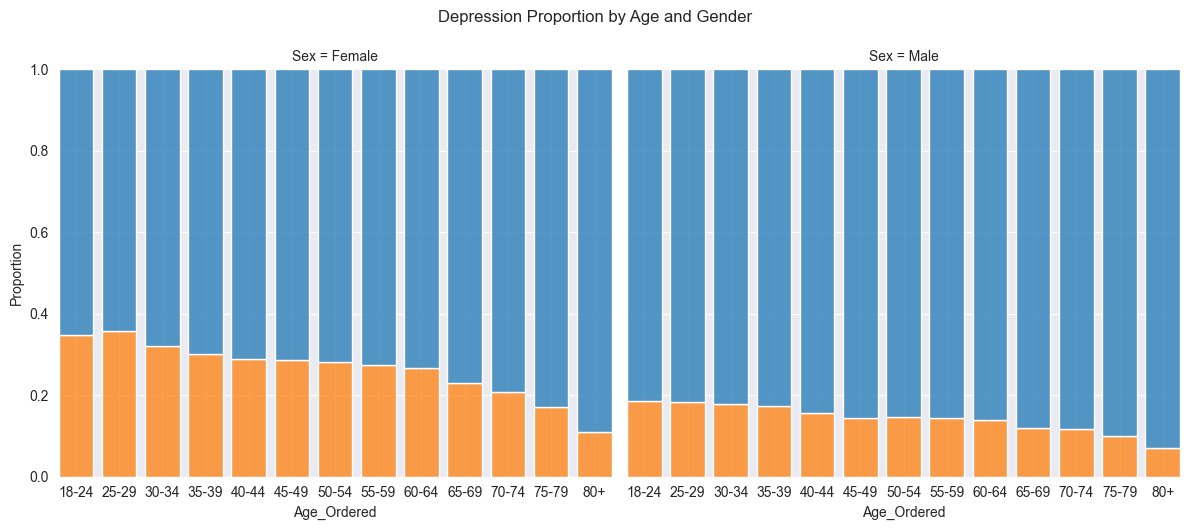

In [53]:
#facet plot by sex to show the change of distribution of patient for each age group

g = sns.FacetGrid(CVD_df, col = 'Sex', height=5, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Age_Ordered", 
    hue = "Depression",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Depression Proportion by Age and Gender',y = 1.05)
plt.show()

Comorbidity

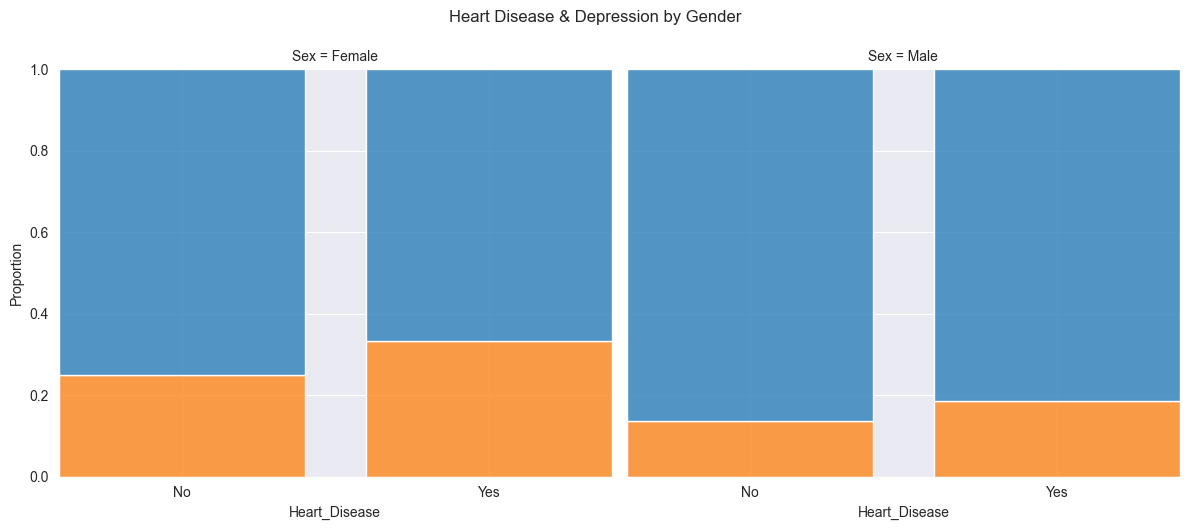

In [54]:
g = sns.FacetGrid(CVD_df, col = 'Sex', height=5, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Depression",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease & Depression by Gender',y = 1.05)
plt.show()

> Females have higher depression than males regardless of whether they have heart disease. For both gender, those who have heart disease are more likely to have depression as well. 

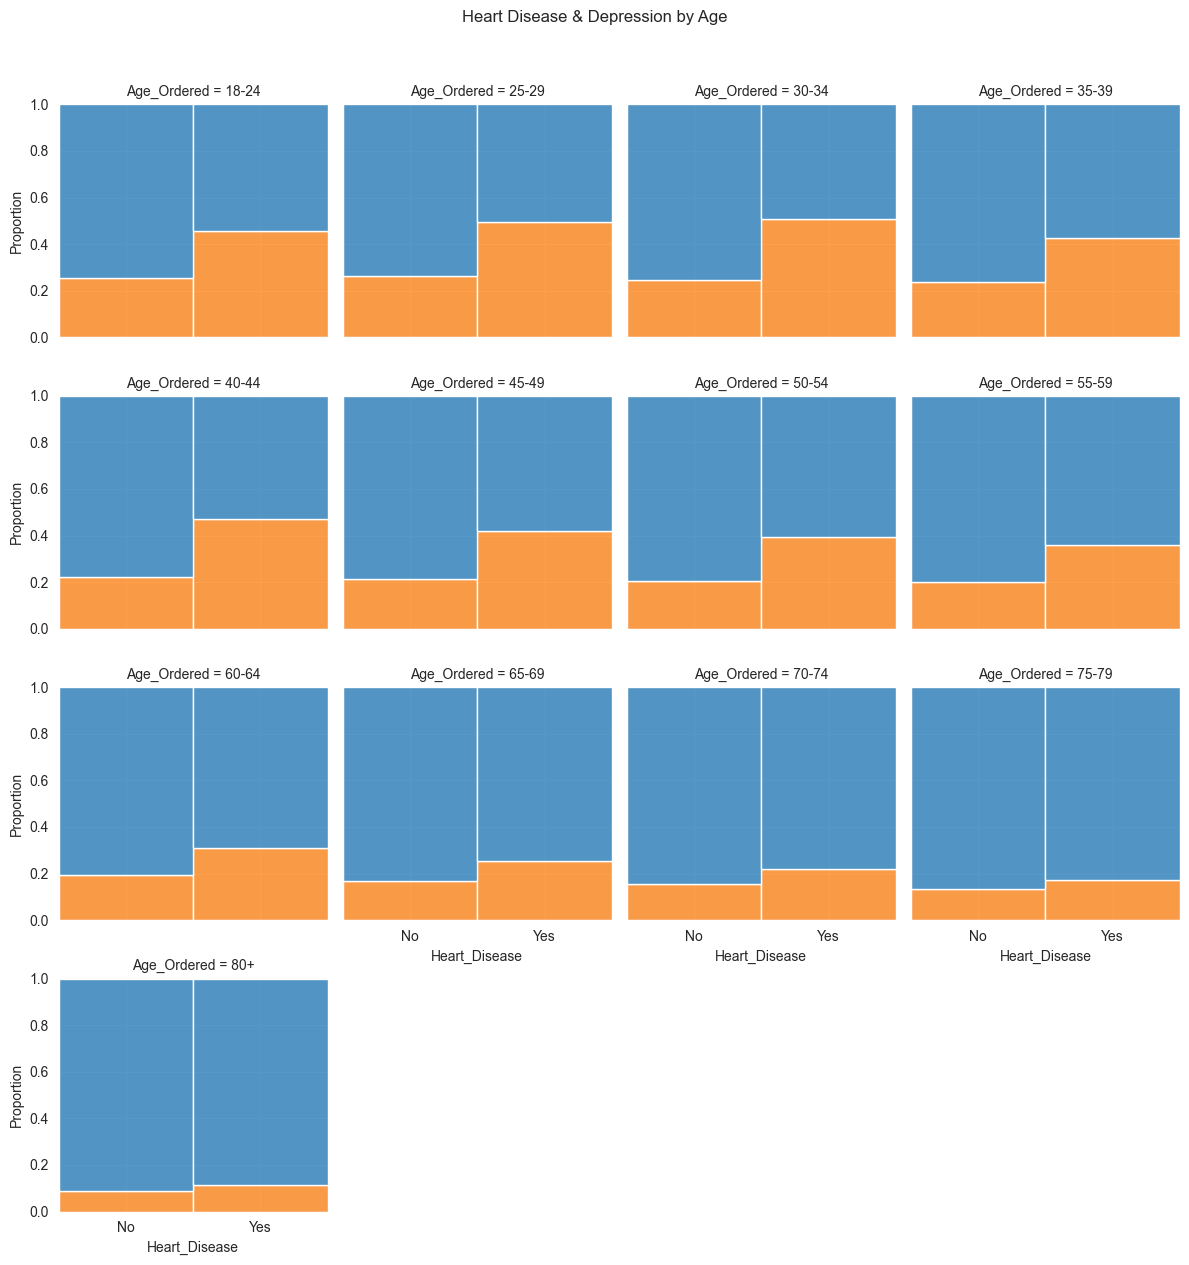

In [55]:
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', col_wrap = 4, height=3, aspect=1)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Depression",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True))
g.fig.suptitle('Heart Disease & Depression by Age',y = 1.05)
plt.show()

> Those having heart disease are more likely to have depression than those who do not have heart disease, but this difference become smaller and smaller as age increases.

Lifestyle and Comorbidity

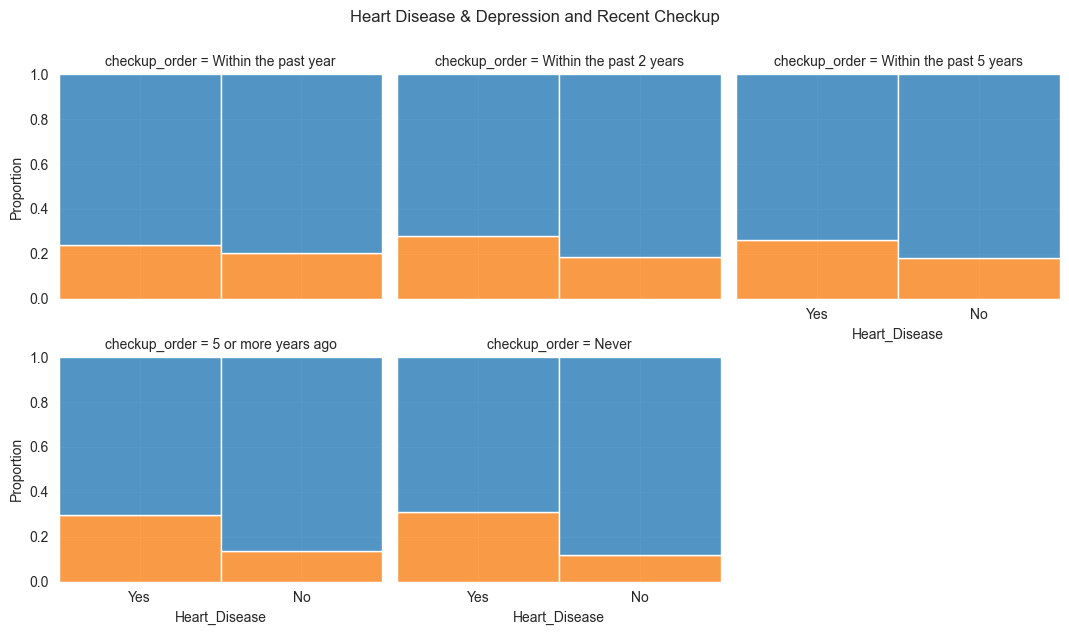

In [56]:
g = sns.FacetGrid(CVD_df, col = 'checkup_order', col_wrap = 3, height=3, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Depression",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True))
g.fig.suptitle('Heart Disease & Depression and Recent Checkup',y = 1.05)
plt.show()

> The proportion of having both heart disease and depression seem to be higher in those who do not have recent doctoral checkups. 

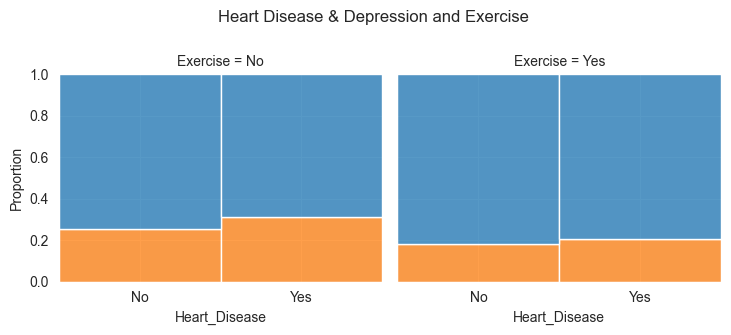

In [57]:
g = sns.FacetGrid(CVD_df, col = 'Exercise', col_wrap = 3, height=3, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Depression",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True))
g.fig.suptitle('Heart Disease & Depression and Exercise',y = 1.1, x = 0.35)
plt.show()

> The pattern of comorbidity doesn't seem to differ by exercise measure. Proportion of depression is higher in both category for those having heart disease. 

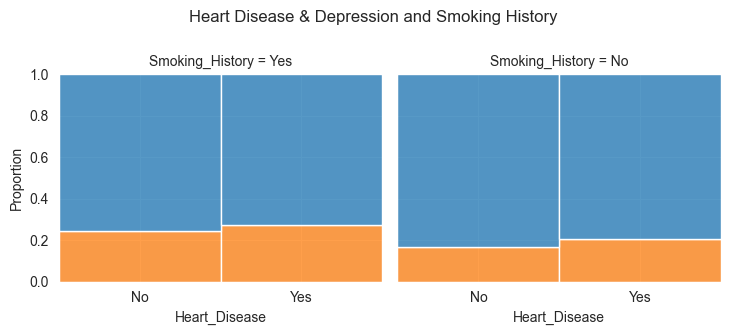

In [58]:
g = sns.FacetGrid(CVD_df, col = 'Smoking_History', col_wrap = 3, height=3, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Depression",
    hue_order=['No','Yes'],
    multiple="fill", stat="proportion",
    discrete=True))
g.fig.suptitle('Heart Disease & Depression and Smoking History',y = 1.1, x = 0.35)
plt.show()

> The pattern of comorbidity doesn't seem to differ by smoking history.

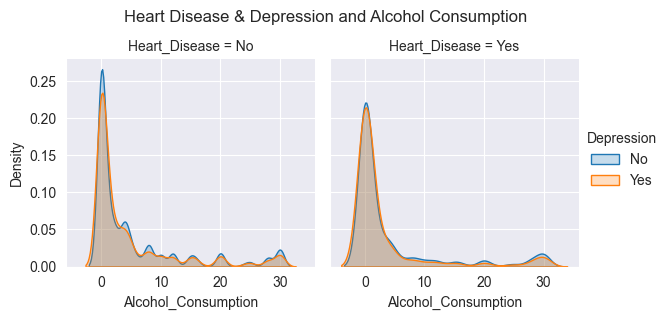

In [59]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Heart_Disease', hue = "Depression", hue_order = ['No',"Yes"],height=3)
g = (g.map_dataframe(sns.kdeplot,
    x="Alcohol_Consumption",
    #hue = "Sex",
    #hue_order = ['Female', 'Male'],
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease & Depression and Alcohol Consumption',y = 1.05)
plt.show()


> Those without heart disease and depression had higher proportion of 0 alcohol consumption.

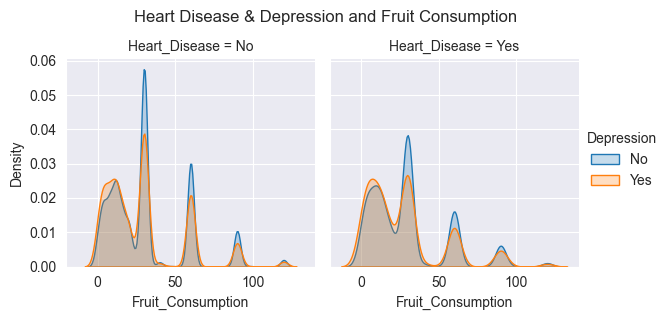

In [60]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Heart_Disease', hue = "Depression", hue_order = ['No',"Yes"],height=3)
g = (g.map_dataframe(sns.kdeplot,
    x="Fruit_Consumption",
    #hue = "Sex",
    #hue_order = ['Female', 'Male'],
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease & Depression and Fruit Consumption',y = 1.05)
plt.show()

> Those with higher incidences of depression and heart disease both saw lower levels of fruit consumption. 

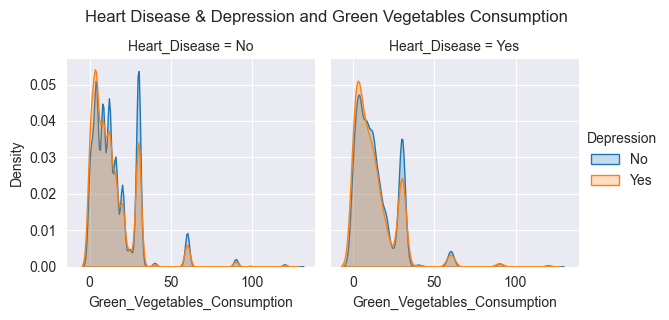

In [61]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Heart_Disease', hue = "Depression", hue_order = ['No',"Yes"],height=3)
g = (g.map_dataframe(sns.kdeplot,
    x="Green_Vegetables_Consumption",
    #hue = "Sex",
    #hue_order = ['Female', 'Male'],
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease & Depression and Green Vegetables Consumption',y = 1.05)
plt.show()

> Those with heart disease seem to have lower green vegetable consumption, regardless of depression. 

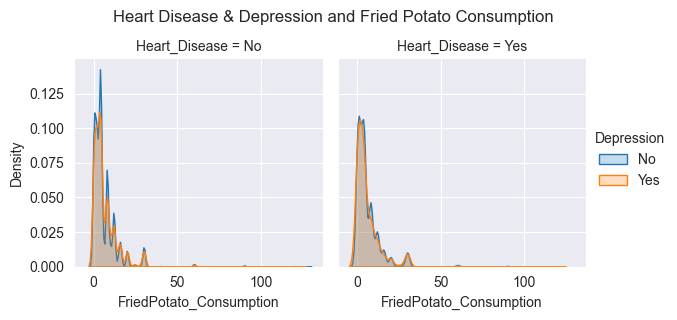

In [62]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Heart_Disease', hue = "Depression", hue_order = ['No',"Yes"],height=3)
g = (g.map_dataframe(sns.kdeplot,
    x="FriedPotato_Consumption",
    #hue = "Sex",
    #hue_order = ['Female', 'Male'],
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease & Depression and Fried Potato Consumption',y = 1.05)
plt.show()

> Those with heart disease seem to have higher fried potato consumption, regardless of depression. 

### Summary of EDA

The sample exhibited a well-balanced gender distribution, with a slight overrepresentation of individuals aged 40 and above. Given that individuals in middle or old age are at a higher risk of heart disease, age emerges as a potentially influential predictor in our dataset. Moreover, age may act as a confounder, as certain lifestyles are more prevalent in older individuals than in younger ones.

Due to right-skewed distributions in some numerical features, we opted to log-transform those variables to enhance the modeling process.

Our bivariate analysis indicates the relevance of both demographic factors and lifestyle variables to the presence of heart disease in our sample. Positive associations were observed between the likelihood of having heart disease and males, and between heart disease and older ages. Conversely, not having a smoking history, low alcohol consumption, and healthier eating habits were associated with a lower proportion of heart disease. An unexpected observation surfaced regarding individuals who had undergone a doctor's checkup in the past 1 or 2 years, showing a higher proportion of heart disease. This could be attributed to the possibility that those who recently had a checkup discovered their heart disease, while those who did not report a recent checkup might still have heart disease but are unaware. This underscores the self-reported nature of the data, with unclear causal directions among variables.

In our exploration of interactions between features concerning heart disease and the comorbidity of heart disease and depression, the EDA suggests potential interactions. Certain risk factors may be more significant for specific gender and age groups. For instance, alcohol consumption appears to play a more crucial role in younger heart disease patients than in older ones, and BMI may be a stronger predictor for younger individuals. However, such interactions were not observed in our analysis of the comorbidity of heart disease and depression.


## Modeling Part I: Heart Disease Prediction
In this section we seek to develop a performant model that can predict the presence, or lack thereof, of heart disease in individual patients. Modeling is broken out into 4 sections which aim to address distinct aspects of the process. The first, [Data Preprocessing & Feature Engineering](#data-preprocessing-&-feature-engineering), uses insights from Exploratory Data Analysis to engineer new features and perform appropriate preprocessing steps given each feature's distribution and type (i.e., contiunuous vs. categorical, nominal vs. ordinal, etc.). Next, in the [Hyperparameter Tuning & Model Selection](#hyperparameter-tuning-&-model-selection) section we outline the set of models considered for the analysis, including the baseline model, define the hyperparameter tuning procedure, as well as conduct the training and validation process to find the highest performing model. Once the best model is selected, we assess the out-of-sample performance of the model and its ability to generalize on new unseen data in the [Performance Assessment](#performance-assessment) section. Finally, we attempt to interpret the model and its predictions in the [Model Interpretation](#model-interpretation) section.

In [63]:
# import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

from scipy.stats import uniform

import os
import joblib

### Data Preprocessing & Feature Engineering

> Based on knowledge gained in EDA and contextual information about the data, we preprocess the data by forming new categories for features Checkup, Age_Category, and Diabetes. The target, Heart_Disease is encoded binary, where the positive class is a 1 and negative class is 0. BMI is binned based on standard CDC cutoffs (https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.).

In [64]:
# define feature replacement map and new categories for variables
replace_dict = {
    'Heart_Disease': {'Yes': 1, 'No': 0},
    'Checkup': {
        'Within the past 2 years': 'Past 2 years', 
        'Within the past year': 'Past 1 year',
        '5 or more years ago': '5+ years', 
        'Within the past 5 years': 'Past 5 years', 
        'Never': 'Never'
    },
    'Age_Category': {
        '18-24': 'Young Adult',
        '25-29': 'Adult',
        '30-34': 'Adult',
        '35-39': 'Adult',
        '40-44': 'Middle-Aged',
        '45-49': 'Middle-Aged',
        '50-54': 'Middle-Aged',
        '55-59': 'Senior-Adult',
        '60-64': 'Senior-Adult',
        '65-69': 'Elderly',
        '70-74': 'Elderly',
        '75-79': 'Elderly',
        '80+': 'Elderly',
    },
    'Diabetes': {
        'No': 'No', 
        'Yes': 'Yes', 
        'No, pre-diabetes or borderline diabetes': 'No',
        'Yes, but female told only during pregnancy': 'Yes'
    }
}

# replace values in dataframe
CVD_ml = CVD_df.replace(replace_dict)

# bin BMI into categories
CVD_ml['BMI'] = pd.cut(
    x=CVD_df.BMI,
    bins=[0, 18.5, 25, 30, 35, 40, np.inf],
    right=False,
    labels=[
        'Underweight', 
        'Healthy',
        'Overweight',
        'Obese I',
        'Obese II',
        'Obese III'
    ]
)

# convert data to categorical where relevant
CVD_ml = CVD_ml.apply(lambda x: x.astype('category') if x.dtype=='object' else x)
CVD_ml = CVD_ml.drop(
    ['Age_Ordered', 'General_Health_order', 'Diabetes_order', 'checkup_order'],
    axis=1
)

> The data is split into training and testing sets, and a feature encoding pipeline is defined for use on the data. The split is stratified according to the distribution of the classes in the target variable, ensuring that both the train and test sets have an approximately equal distribution of both classes in their data set splits. This will ensure that the training set is representative of the data distribution with respect to the target variable, and likewise with the testing set. A 80/20 train-test split is used. The following features are nominal categorical variables and as a result one-hot encoded: Exercise, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Sex, and Smoking_History.  BMI, General_Health, Checkup, and Age_Category are ordinal categorical variables and are encoded using levels, and then these features are standardized. All other variables are continuous, so are standardized to mean 0 and unit variance.

In [65]:
# separate targets from features
features, target = CVD_ml.drop("Heart_Disease", axis=1), CVD_ml.Heart_Disease

# perform train test split with stratification by class proportions
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=test_size, 
    random_state=seed, 
    stratify=target
)

# define preprocessing pipeline for data
preprocessing_map = gen_features(
    columns=[
        ["Exercise"], ["Skin_Cancer"], ["Other_Cancer"], 
        ["Depression"], ["Diabetes"], ["Arthritis"],
        ["Sex"], ["Smoking_History"]
    ],
    classes=[OneHotEncoder]
) + [
    (['BMI'], [OrdinalEncoder(categories=[['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III']]), StandardScaler()], {}),
    (["General_Health"], [OrdinalEncoder(categories=[['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']]), StandardScaler()], {}),
    (["Checkup"], [OrdinalEncoder(categories=[['Past 1 year', 'Past 2 years', 'Past 5 years', '5+ years', 'Never']]), StandardScaler()], {}),
    (["Age_Category"], [OrdinalEncoder(categories=[['Young Adult', 'Adult', 'Middle-Aged', 'Senior-Adult', 'Elderly']]), StandardScaler()], {})
]
df_mapper = DataFrameMapper(preprocessing_map, default=[StandardScaler()])

> Here we check that the distribution of the dominant class is the same in the training and testing splits.

In [66]:
# check split of data to ensure balance
print(
    f"Training set has {len(y_train)} observations with " +
    f"{y_train.value_counts()[0]*100/len(y_train):.3f}% of the dominant class."
)
print(
    f"Testing set has {len(y_test)} observations with " + 
    f"{y_test.value_counts()[0]*100/len(y_test):.3f}% of the dominant class."
)

Training set has 247083 observations with 91.915% of the dominant class.
Testing set has 61771 observations with 91.915% of the dominant class.


### Hyperparameter Tuning & Model Selection
The Decision Tree classifier is our base model of choice given its simiplicity and interpretability. If the model performs well, then there may be minimal need to shift to more complicated models. That said, we do choose 3 other model families as candidates: 
* **Logistic Regression** due to its interpretability and ability to performance regularization on features
* **Random Forest** for its ability to reduce the variance that might be seen when using a single decision tree
* **Gradient Boosting** which is known to be a robust and highly performant ensemble learning technique 

The dataset has a significant class imbalance, so we use class weights (or sample weights) in each of our models to adjust for this imbalance. Traditionally, these models would penalize the classification error of the positive and negative classes equally. By using class or sample weights, the loss function of the model is adjusted such that it penalizes the model more for misclassifying the positive (minority) class, placing more emphasis on learning to classify these difficult observations than the majority class. This helps improve performance meaningfully. 

Given the dataset is imbalanced, we do not use accuracy as our primary performance metric. Instead we use the area under the receiving operator characteristic curve (AUROC) as our performance evaluation metric for the models, given it takes into account the model's ability to successfully classify both the minority and dominant class.

To train our models, execute hyperparameter tuning, and assess model performance, we use a randomized search cross-validation approach. The process is as follows: first, the hyperparameter search space is defined for each candidate model family and we define a number of models (i.e., 25) to train from each family; next, for each model family, the training dataset is split into 5 folds (stratified by the target distribution), a set of 25 hyperparameters are randomly sampled from the predefined hyperparameter search space and used to train distinct models use a 5-fold cross-validation strategy; the AUROC is averaged over the 5 validation folds to yield a robust model validation metric, and the single model of the 25 trained, with the highest average AUROC, is selected as the candidate for a given model family; finally, once each model family, in this case Logistic Regression, Random Forest, and Gradient Boosting Trees, has a top candidate, the model with the highest AUROC is selected and moves on to be evaluated on the testing dataset.

**Ultimately, the Gradient Boosting classifier is shown the be the highest performing, and is evaluated on the testing dataset using AUROC among other metrics, and a confusion matrix.**

In [67]:
# define sample weights for Gradient Boosting to adjust for class imbalance
weights = [y_train.shape[0]/(2*y_train.value_counts()[0]), y_train.shape[0]/(2*y_train.value_counts()[1])]
fit_dict = {'GBM__sample_weight': y_train.apply(lambda x: weights[x])}

# cpus to use
cpus = os.cpu_count() - 1

# define the number of parameters for cross-validation scheme
k = 5 # CV folds
num_models = 100

# define models and their hyperparameter search space 
models = {
    "DT": [
        DecisionTreeClassifier(class_weight="balanced", random_state=seed),
        {}
    ],
    "LGR": [
        LogisticRegression(
            class_weight="balanced", 
            penalty="elasticnet", 
            solver="saga", 
            max_iter=1000, 
            random_state=seed
        ),
        {
            "LGR__C": uniform(loc=0,scale=4), 
            "LGR__l1_ratio": uniform(loc=0, scale=1)
        }
    ],
    "RF": [
        RandomForestClassifier(
            random_state=seed,
            n_jobs=cpus,
            class_weight='balanced'
        ),
        {
            "RF__n_estimators": list(range(50,5000,50)), 
            "RF__max_features": ["sqrt", "log2"], 
            "RF__min_samples_leaf": uniform(loc=0, scale=1),
            "RF__max_depth": list(range(1,50)) + [None]
        }
    ],
    "GBM": [
        GradientBoostingClassifier(
            n_iter_no_change=10,
            validation_fraction=0.1,
            random_state=seed,
        ),
        {
            "GBM__learning_rate": uniform(loc=0, scale=0.4),
            "GBM__n_estimators": [1] + list(range(25,5000,25)),
            "GBM__min_samples_split": uniform(loc=0, scale=1),
            "GBM__min_samples_leaf": uniform(loc=0, scale=1),
            "GBM__max_depth": list(range(1,25)),
            "GBM__max_features": ["sqrt", "log2"],
            "GBM__subsample": np.linspace(0.5, 1.0, num=20)
        }
    ]
}


> Above we define all the parameters used in our training procedures (e.g., number CPUs, number of models trained for each family), as well as the hyperparameter search space used in the randomized cross-validation procedure.

In [68]:
# variables to save best model
best_model = None
best_score = 0

#dict to track model performance
model_performance = {}

# execute randomized cross-validation hyperparameter tuning for each class of model
for model in models:
    print(f"Randomized {k}-Fold CV for {model} Model:")

    # define a pipeline for the preprocessing steps on the data and the estimator 
    pipe = Pipeline(
        [
            ("mapper", df_mapper), 
            (model, models[model][0])
        ]
    )

    # define randomized search scheme for hyperparameter tuning
    rcv = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=models[model][1],
        n_iter=num_models if model != "DT" else 1,
        scoring="roc_auc",
        cv=k, 
        random_state=seed,
        n_jobs=cpus,
        verbose=1
    )

    # perform randomized hyperparameter tuning
    if model == 'GBM':
        rcv.fit(X_train, y_train, **fit_dict)
    else:
        rcv.fit(X_train, y_train)

    # report cross-validation AUC ROC score for best estimator found
    print(f'CV Performance Reporting: AUROC = {rcv.best_score_:.3f}' +
     f' (sd = {rcv.cv_results_["std_test_score"][rcv.best_index_]:.3f})\n')

    # save best model performance - avg AUROC score, sd across CV folds, and best hyperparameters
    model_performance[model] = [
        rcv.best_score_, 
        rcv.cv_results_["std_test_score"][rcv.best_index_],
    ]
    joblib.dump(rcv, "./CVD_modeling1_"+model+".joblib")

    # save best class of model found
    if rcv.best_score_ > best_score:
        best_score = rcv.best_score_
        best_model = rcv

Randomized 5-Fold CV for DT Model:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CV Performance Reporting: AUROC = 0.562 (sd = 0.004)

Randomized 5-Fold CV for LGR Model:
Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Performance Reporting: AUROC = 0.806 (sd = 0.001)

Randomized 5-Fold CV for RF Model:
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/peterakioyamen/.pyenv/versions/3.11.4/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CV Performance Reporting: AUROC = 0.816 (sd = 0.001)

Randomized 5-Fold CV for GBM Model:
Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Performance Reporting: AUROC = 0.829 (sd = 0.001)



> We execute the randomized search cross-validation procedure to automate the process of hyperparameter tuning, model validation, and model selection, saving the top model for each model family in a readable file to avoid retraining and tracking performance in a dictionary.

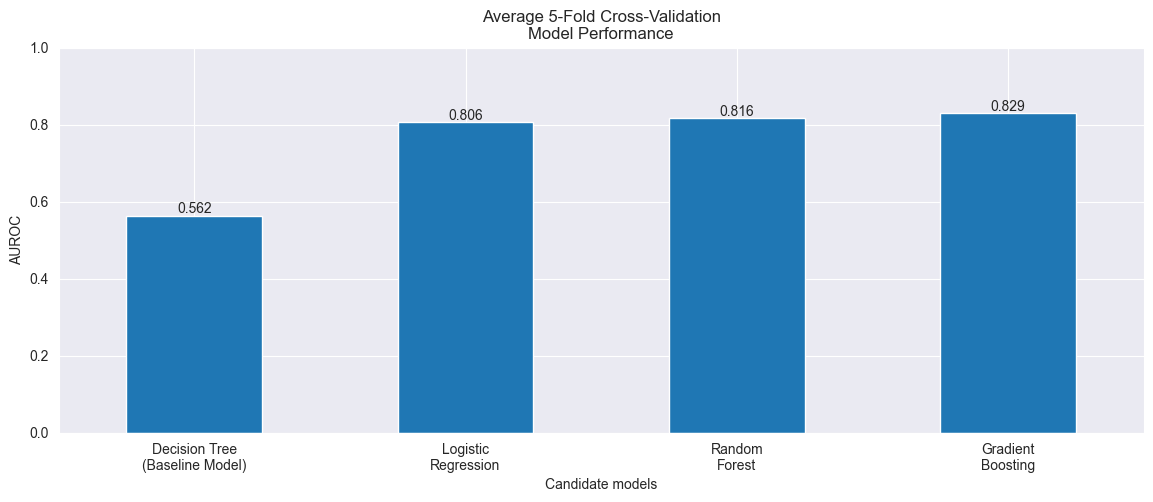

In [135]:
model_performance_df = pd.DataFrame(model_performance, index=['AUROC', 'SD']).T.sort_values("AUROC")
model_performance_df["AUROC"] = model_performance_df["AUROC"].apply(lambda x: round(x, ndigits=3))

ax = model_performance_df.plot(
    y='AUROC', 
    kind='bar',
    figsize=(14,5),
    rot=0,
    ylim=[0,1],
    legend=False,
)

plt.title(
    'Average 5-Fold Cross-Validation\nModel Performance',
)
plt.xlabel(
    'Candidate models',
)
plt.ylabel(
    'AUROC',
)
ax.bar_label(ax.containers[0])
plt.xticks(
    list(range(4)), 
    [
        'Decision Tree\n(Baseline Model)', 
        'Logistic\nRegression', 
        'Random\nForest', 
        'Gradient\nBoosting'
    ]
)

plt.show();

> Baseline model performance is much lower than our tuned model candidates, but gradient boosting performs the best across validation datasets and will be the evaluated on the testing set.

### Performance Assessment
The gradient boosting model achieves a ~0.75 AUROC on the testing dataset, which may be considered moderate to good based on academic literature, but well below excellent.<sup>[[1](#cite_note-1)]</sup> Using class weightings, we were able to increase recall at the expense of precision with respect to the positive class. That is, more individuals were classified as having cardiovascular disease than actually did have it, and as a result there are more false positives, but, by placing emphasis on the positive (minority) class during training there are also less false negatives and a greater proportion of individuals who actually do have heart diseases are being classified correctly. The model achieved a recall of ~81% and a precision of ~18%. If the model were to be deployed, we would likely accept more false positives in exchange for fewer false negatives, so this tradeoff between precision and recall seems tolerable.

[<a id="cite_note-1">1</a>]: de Hond, Anne AH, Ewout W. Steyerberg, and Ben van Calster. "Interpreting area under the receiver operating characteristic curve." The Lancet Digital Health 4.12 (2022): e853-e855. https://doi.org/10.1016/S2589-7500(22)00188-1.

In [74]:
# prediction on test set
y_hat = best_model.predict(X_test)

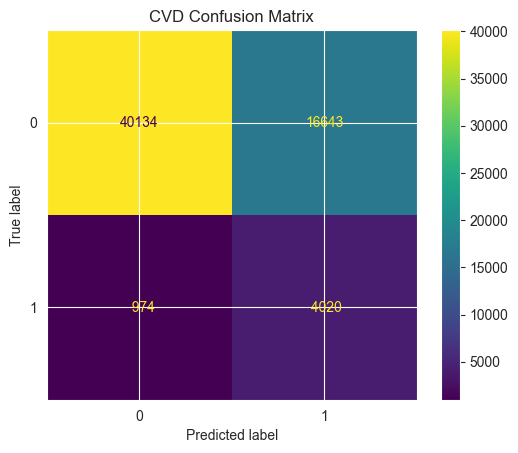

In [130]:
# show confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_hat,  
    values_format='5d'
)

plt.title('CVD Confusion Matrix')
plt.show();

In [77]:
# predict classes in test set
model_name = model_performance_df\
    .index[model_performance_df\
    .AUROC.argmax()]

# output performance summary
print(f"Best Model: {model_name}")
print(
    f"Testing AUROC: " + 
    f"{roc_auc_score(y_test, y_hat):.4f}\n"
)
print("Classification Report:")
print(pd.DataFrame(classification_report(
    y_test, 
    y_hat, 
    output_dict=True)
).T)

Best Model: GBM
Testing AUROC: 0.7559

Classification Report:
              precision    recall  f1-score       support
0              0.976306  0.706871  0.820023  56777.000000
1              0.194551  0.804966  0.313365   4994.000000
accuracy       0.714801  0.714801  0.714801      0.714801
macro avg      0.585428  0.755918  0.566694  61771.000000
weighted avg   0.913104  0.714801  0.779062  61771.000000


### Model Interpretation
Permutation importance is used to understand the features that are the most influential and predictive for our gradient boosting model. In this, we destroy the marginal distribution of each feature, one by one, by randomly permuting the column and then attempting to predict the target variable. The importance of each feature is defined as the difference between the model's established performance and the performance based on permuted data. The most important features are those with the largest delta. Performance is still evaluated on the basis of AUROC using the testing dataset. 

**Age was identified as the most important predictive feature in the Gradient Boosting model.**

In [86]:
# computer permutation feature importance 
feature_imp = permutation_importance(
    best_model, 
    X=X_test,
    y=y_test,
    scoring='roc_auc',
    n_repeats=20,
    n_jobs=cpus,
    random_state=seed,
)
del feature_imp['importances']

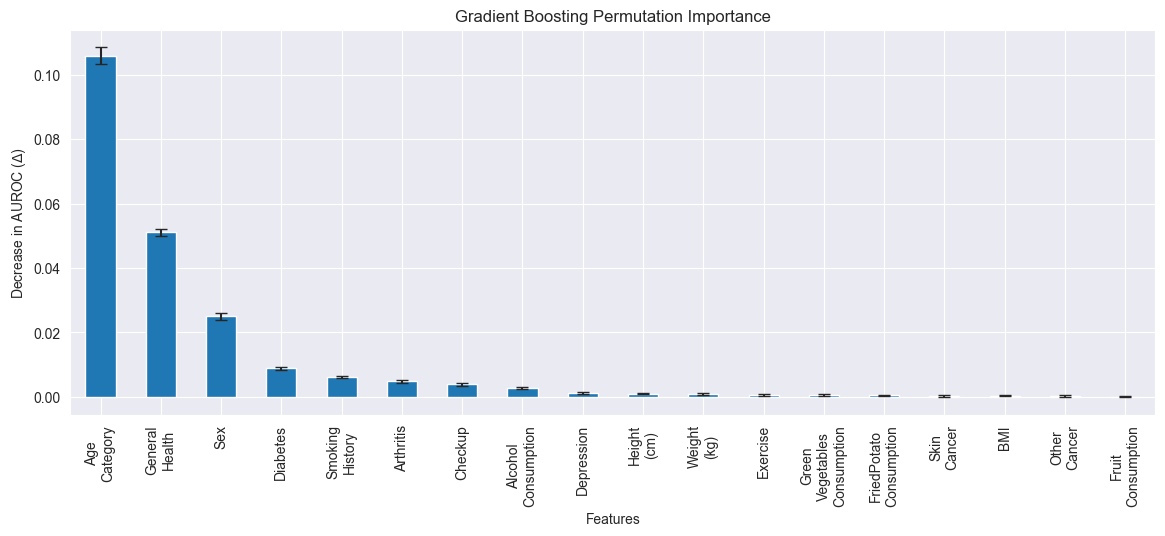

In [134]:
feature_imp_df = pd.DataFrame(feature_imp, index=X_test.columns).sort_values("importances_mean", ascending=False)
ax = feature_imp_df.plot(
    y='importances_mean',
    yerr='importances_std',
    kind='bar',
    capsize=4,
    figsize=(14,5),
    legend=False,
)

plt.title(
    'Gradient Boosting Permutation Importance',
)
plt.xlabel(
    'Features',
)
plt.ylabel(
    'Decrease in AUROC ($\Delta$)',
)
plt.xticks(
    list(range(len(feature_imp_df.index))), 
    list(map(lambda x: ' '.join(x.split('_')).replace(" ", '\n'), feature_imp_df.index)),
)
plt.show();

> Age is by far the most significant determinant of cardiovascular disease as it relates to the gradient boosting model's predictive capabilities. Additionally, demographic characteristics such as sex also seem to be predictive. These are risk factors that people cannot directly control for, but can be used in developing preventative care strategies and monitoring schedules. Lifestyle choices, however, such as smoking or those that impact the likelihood of developing diabetes and decrease a person's general health, are also within the top 5 most predicitive features and can be directly influenced by individuals.

## Modeling Part II: Comorbidity Prediction (Heart Disease & Depression)
Our exploratory data analysis (EDA) reveals that over 20 percent of the entire sample reported experiencing symptoms of depression. In line with established research findings (citation), approximately 24% of individuals who reported having heart disease also indicated the presence of depression symptoms.

After successfully developing a robust prediction model for heart disease, we applied the same methodology to construct a predictive model for identifying the presence or absence of comorbidity between heart disease and depression. Like the previous section, this section encompasses four sub-sections: Data Preprocessing & Feature Engineering, Hyperparameter Tuning & Model Selection, Performance Assessment, and Model Interpretation. Most of these procedures mirror those employed in the development of the heart disease model, with the exception of the newly introduced variable, Comorbidity.


### Data Preprocessing

The categorical variables introduced in the previous section, namely Checkup, Age_Category, Diabetes, and BMI, have been incorporated into this subsequent modeling effort for predicting Comorbidity.

Instead of recoding Heart_Disease as binary (1 vs. 0), a novel variable named "Comorbidity" has been created using information from both Heart_Disease and Depression variables. Among the total 308,854 participants, 6,101 (~2%) reported experiencing both heart disease and depression and their Comorbidity status is denoted as 1. The remaining participants who fall into all other scenarios are coded as 0 for this variable (i.e., 0 if having at most one of these two diseases, but not both).
predictive

In [112]:
# Make a copy of the dataframe used in Part I.
CVD_DP_ml = CVD_ml.copy(deep=True)

# recode Heart Disease back to Yes-No binary variable. 
replace_back = {
    'Heart_Disease':{1:'Yes', 0: 'No'}
}

CVD_DP_ml = CVD_DP_ml.replace(replace_back)

## Creating new target variable "Comorbidity".
CVD_DP_ml['Comorbidity'] = CVD_DP_ml.apply(lambda x: 1 if x['Heart_Disease'] == "Yes" and
                        x['Depression']== "Yes" else 
                        0, axis =1)

#check the distribution of Comorbidity using 2 by 2 table.
pd.crosstab(CVD_DP_ml['Heart_Disease'], CVD_DP_ml['Depression'])

Depression         No    Yes
Heart_Disease               
No             228083  55800
Yes             18870   6101

We applied the same methods to split the data into training and testing subsets. Due to the imbalanced distribution of classes in the Comorbidity variable, stratification was employed once again to ensure that both the training and test datasets maintain an approximately equal distribution of both classes. The data was split using an 80/20 train-test ratio, and the types of variables (i.e., nominal, ordinal, and continuous) remained the same as they were in the model for heart disease prediction.

A crucial modification involves excluding both Depression and Heart Disease from the predicting features for Comorbidity. This adjustment is made since the target variable is derived from these two variables, rendering the Comorbidity perfectly predictable if the model includes these two features.


In [113]:
#separate targets from features;
#Removing heart disease and depression, since including these two variables will perfectly predict the outcome.
features_c, target_c = CVD_DP_ml.drop(columns = [
     'Comorbidity','Heart_Disease','Depression']), CVD_DP_ml['Comorbidity']

# perform train test split with stratification by class proportions
seed = 123 #using the same seed as the CVD model
test_size = 0.2
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    features_c,
    target_c,
    test_size=test_size,
    random_state=seed,
    stratify=target_c
)

In [114]:
#Again, Heart Disease and Depression are removed from the features in this model. 
preprocessing_map_c = gen_features(
    columns=[
        ["Exercise"], ["Skin_Cancer"], ["Other_Cancer"],
        ["Diabetes"], ["Arthritis"],
        ["Sex"], ["Smoking_History"]
    ],
    classes=[OneHotEncoder]
) + [
    (['BMI'], [OrdinalEncoder(categories=[['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III']]), StandardScaler()], {}),
    (["General_Health"], [OrdinalEncoder(categories=[['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']]), StandardScaler()], {}),
    (["Checkup"], [OrdinalEncoder(categories=[['Past 1 year', 'Past 2 years', 'Past 5 years', '5+ years', 'Never']]), StandardScaler()], {}),
    (["Age_Category"], [OrdinalEncoder(categories=[['Young Adult', 'Adult', 'Middle-Aged', 'Senior-Adult', 'Elderly']]), StandardScaler()], {})
]
df_mapper_c = DataFrameMapper(preprocessing_map_c, default=[StandardScaler()])

In [118]:
# The length of training and testing are the same as the first model, but the imbalance of the two classes is more dramatic. 
print(f"Training set has {len(y_train_c)} observations with {y_train_c.value_counts()[0]*100/len(y_train_c):.3f}% of the dominant class.")
print(f"Testing set has {len(y_test_c)} observations with {y_test_c.value_counts()[0]*100/len(y_test_c):.3f}% of the dominant class.")

Training set has 247083 observations with 98.025% of the dominant class.
Testing set has 61771 observations with 98.025% of the dominant class.


### Hyperparameter Tuning & Model Selection

We reproduced the randomized search cross-validation methodology employed in the preceding section to identify the most predictive model for Comorbidity (refer to the previous section for detailed methodology). Among the four model candidates, the Gradient Boosting classifier once more yielded the highest), indicating superior performance.


In [120]:
# define sample weights for Gradient Boosting. toadjust for class imbalance
weights_c = [y_train_c.shape[0]/(2*y_train_c.value_counts()[0]), y_train_c.shape[0]/(2*y_train_c.value_counts()[1])]
fit_dict_c = {'GBM__sample_weight': y_train_c.apply(lambda x: weights_c[x])}

# cpus to use
cpus = os.cpu_count() - 1

# define models and their hyperparameter search space
models_c = {
    "DT": [
        DecisionTreeClassifier(class_weight="balanced", random_state=seed),
        {}
    ],
    "LGR": [
        LogisticRegression(
            class_weight="balanced",
            penalty="elasticnet",
            solver="saga",
            max_iter=1000,
            random_state=seed
        ),
        {
            "LGR__C": uniform(loc=0,scale=4),
            "LGR__l1_ratio": uniform(loc=0, scale=1)
        }
    ],
    "RF": [
        RandomForestClassifier(
            random_state=seed,
            n_jobs=cpus,
            class_weight='balanced'
        ),
        {
            "RF__n_estimators": list(range(50,5000,50)),
            "RF__max_features": ["sqrt", "log2"],
            "RF__min_samples_leaf": uniform(loc=0, scale=1),
            "RF__max_depth": list(range(1,50)) + [None]
        }
    ],
    "GBM": [
        GradientBoostingClassifier(
            n_iter_no_change=10,
            validation_fraction=0.1,
            random_state=seed,
        ),
        {
            "GBM__learning_rate": uniform(loc=0, scale=0.4),
            "GBM__n_estimators": [1] + list(range(25,5000,25)),
            "GBM__min_samples_split": uniform(loc=0, scale=1),
            "GBM__min_samples_leaf": uniform(loc=0, scale=1),
            "GBM__max_depth": list(range(1,25)),
            "GBM__max_features": ["sqrt", "log2"],
            "GBM__subsample": np.linspace(0.5, 1.0, num=20)
        }
    ]
}


In [121]:
# define the number of parameters for cross-validation scheme
k = 5 # CV folds
num_models = 100

# variables to save best model
best_model_c = None
best_score_c = 0

#dict to track model performance
model_performance_c = {}

# execute randomized cross-validation hyperparameter tuning for each class of model
for model in models_c:
    print(f"Randomized {k}-Fold CV for {model} Model:")

    # define a pipeline for the preprocessing steps on the data and the estimator
    pipe = Pipeline(
        [
            ("mapper", df_mapper_c),
            (model, models_c[model][0])
        ]
    )

    # define randomized search scheme for hyperparameter tuning
    rcv = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=models_c[model][1],
        n_iter=num_models if model != "DT" else 1,
        scoring="roc_auc",
        cv=k,
        random_state=seed,
        n_jobs=cpus,
        verbose=1
    )

    # perform randomized hyperparameter tuning
    if model == 'GBM':
        rcv.fit(X_train_c, y_train_c, **fit_dict_c)
    else:
        rcv.fit(X_train_c, y_train_c)

    # report cross-validation AUC ROC score for best estimator found
    print(f'CV Performance Reporting: AUROC = {rcv.best_score_:.3f}' +
     f' (sd = {rcv.cv_results_["std_test_score"][rcv.best_index_]:.3f})\n')

    # save best model performance - avg AUROC score, sd across CV folds, and best hyperparameters
    model_performance_c[model] = [
        rcv.best_score_,
        rcv.cv_results_["std_test_score"][rcv.best_index_],
    ]
    joblib.dump(rcv, "CVD_modeling2_"+model+".joblib")

    # save best class of model found
    if rcv.best_score_ > best_score_c:
        best_score_c = rcv.best_score_
        best_model_c = rcv

Randomized 5-Fold CV for DT Model:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CV Performance Reporting: AUROC = 0.528 (sd = 0.003)

Randomized 5-Fold CV for LGR Model:
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/peterakioyamen/.pyenv/versions/3.11.4/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CV Performance Reporting: AUROC = 0.799 (sd = 0.002)

Randomized 5-Fold CV for RF Model:
Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Performance Reporting: AUROC = 0.825 (sd = 0.002)

Randomized 5-Fold CV for GBM Model:
Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Performance Reporting: AUROC = 0.837 (sd = 0.004)



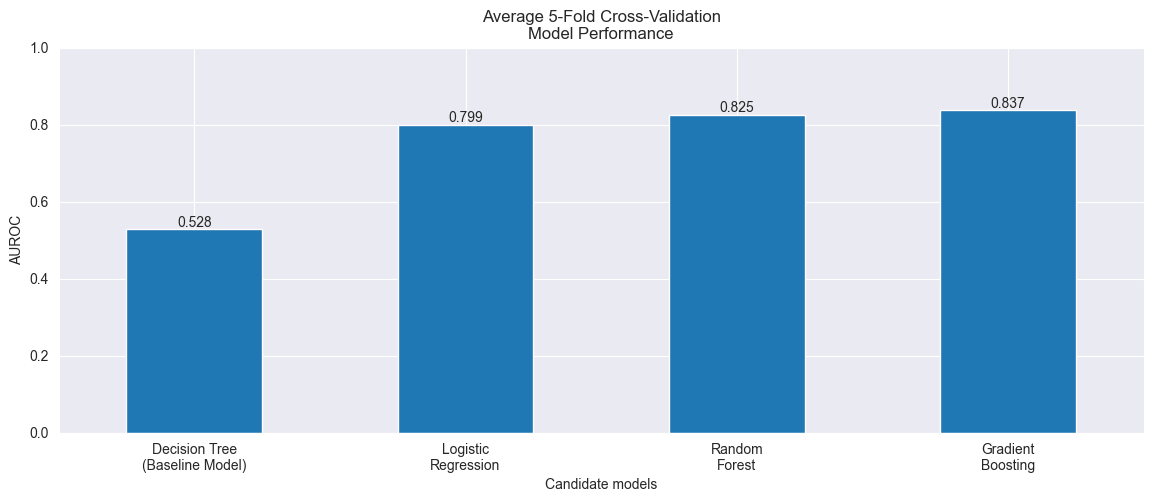

In [133]:
model_performance_df_c = pd.DataFrame(model_performance_c, index=['AUROC', 'SD']).T.sort_values("AUROC")
model_performance_df_c["AUROC"] = model_performance_df_c["AUROC"].apply(lambda x: round(x, ndigits=3))

ax = model_performance_df_c.plot(
    y='AUROC',
    kind='bar',
    figsize=(14,5),
    rot=0,
    ylim=[0,1],
    legend=False,
)

plt.title(
    'Average 5-Fold Cross-Validation\nModel Performance',
)
plt.xlabel(
    'Candidate models',
)
plt.ylabel(
    'AUROC',
)
ax.bar_label(ax.containers[0])
plt.xticks(
    list(range(4)), 
    [
        'Decision Tree\n(Baseline Model)', 
        'Logistic\nRegression', 
        'Random\nForest', 
        'Gradient\nBoosting'
    ]
)
plt.show();

### Performance Assessment

The single decision tree model has much lower performance than the tuned model candidates. The gradient boosting model again performs the best according to the cross-validation results. The performance of the gradient boosting model is then evaluated using the testing dataset. 


In [ ]:
# prediction on test set
y_hat_c = best_model_c.predict(X_test_c)

In [123]:
# predict classes in test set
model_name_c = model_performance_df_c\
    .index[model_performance_df_c\
    .AUROC.argmax()]

# output performance summary
print(f"Best Model: {model_name_c}")
print(
    f"Testing AUROC: " +
    f"{roc_auc_score(y_test_c, y_hat_c):.4f}\n"
)
print("Classification Report:")
print(pd.DataFrame(classification_report(
    y_test_c,
    y_hat_c,
    output_dict=True)
).T)

Best Model: GBM
Testing AUROC: 0.7706

Classification Report:
              precision    recall  f1-score       support
0              0.994324  0.755066  0.858334  60551.000000
1              0.060735  0.786066  0.112757   1220.000000
accuracy       0.755678  0.755678  0.755678      0.755678
macro avg      0.527529  0.770566  0.485545  61771.000000
weighted avg   0.975885  0.755678  0.843608  61771.000000


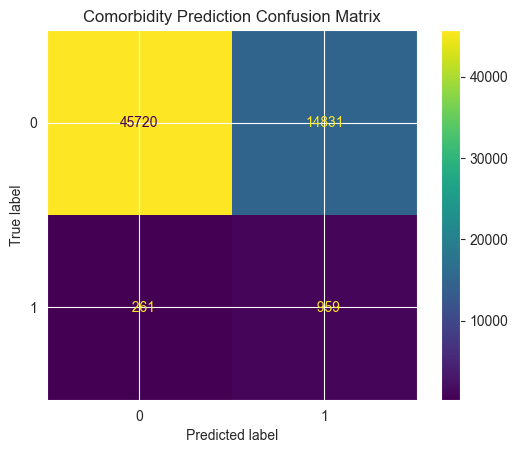

In [124]:
# show confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test_c,
    y_hat_c,
    values_format='5d'
)

plt.title('Comorbidity Prediction Confusion Matrix')
plt.show();

The testing AUROC of the gradient boosting model for comorbidity prediction reaches around 0.76. Similar to the prediction model for heart disease, this model for comorbidity prediction achieves a recall of ~80% for classifying positive class, but a low precision (~0.5%), meaning it has a relatively low false negative rate at the cost of high false positive rate. We still deem this tolerable given the cost of failing to identify the presence of disease is higher than producing a false positive. 


### Model Intrepretation

In [127]:
# computer permutation feature importance
feature_imp_c = permutation_importance(
    best_model_c,
    X=X_test_c,
    y=y_test_c,
    scoring='roc_auc',
    n_repeats=20,
    n_jobs=cpus,
    random_state=seed,
)
del feature_imp_c['importances']

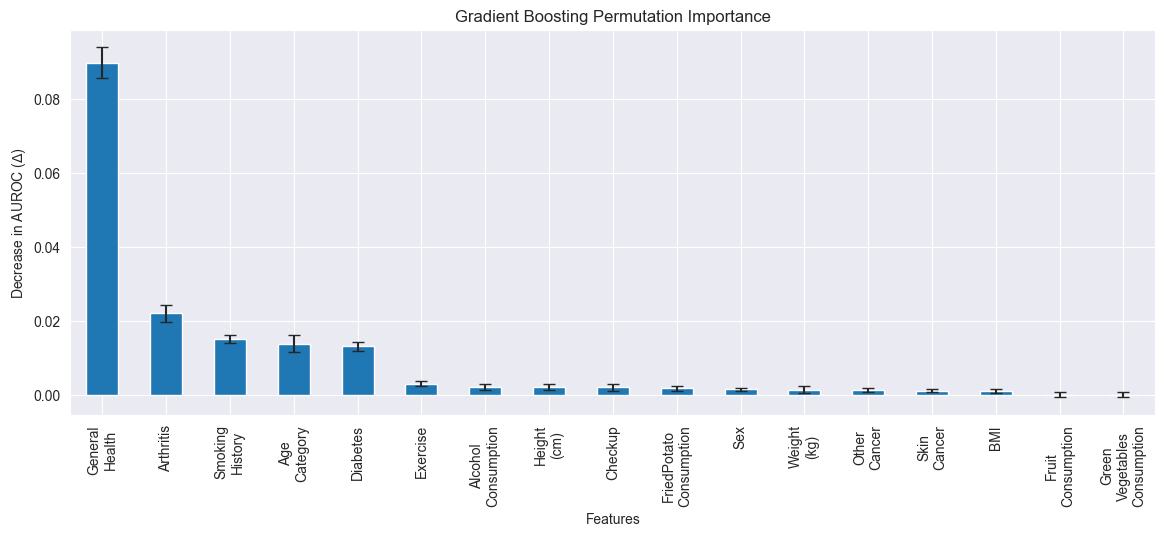

In [131]:
feature_imp_df_c = pd.DataFrame(feature_imp_c, index=X_test_c.columns).sort_values("importances_mean", ascending=False)
ax = feature_imp_df_c.plot(
    y='importances_mean',
    yerr='importances_std',
    kind='bar',
    capsize=4,
    figsize=(14,5),
    legend=False,
)

plt.title(
    'Gradient Boosting Permutation Importance',
)
plt.xlabel(
    'Features',
)
plt.ylabel(
    'Decrease in AUROC ($\Delta$)',
)
plt.xticks(
    list(range(len(feature_imp_df_c.index))), 
    list(map(lambda x: ' '.join(x.split('_')).replace(" ", '\n'), feature_imp_df_c.index)),
)
plt.show();


Permutation importance is used to comprehend the features that wield the most influence and predictive power within the gradient-boosting model for comorbidity prediction. A comprehensive explanation of the methods has been detailed in the preceding section.

In contrast to the model designed for heart disease prediction, where Age Categories take on a predominant role in prediction, the AUROC delta are generally of smaller magnitude for comorbidity prediction. Notably, Self-reported general health emerges as the most influential predictor for the comorbidity between heart disease and depression, closely followed by arthritis. However, it is imperative to exercise caution in interpreting the significance of these two predictors, as the direction of influence (i.e., causal relation) remains unexamined in this study. Smoking is the third most influential risk factor for comorbidity, yet unraveling the nature of its impact poses a challenge. It remains unclear whether smoking exacerbates the likelihood of developing both heart disease and depression or if it is a consequence of having both diseases. This ambiguity underscores the need for further investigation into the intricate relationships between these variables.


## Challenges
There were a few challenges in this analysis. The first being electing how to encode variables, specifically with respect to categorical variables and whether they should be treated as nominal or ordinal. Additionally, given the scale of the data (>100k observations), not all models could be considered for the analysis. Models such as k-nearest neighbors and support vector machines were not tractable on the dataset of this size given the computational hardware available. A final challenge that was encountered during the analysis was the data availability. The dataset was precleaned, and excluded many, perhaps very useful features, from the original source. As a result, much thought was put into how to extract the most value out of the set of features available for use.

## Potential Next Steps
Integrating more recent data into the analysis and exploring the use of more advanced modeling techniques could be worth while if looking to develop a production level system accessible to practitioners. Particularly, other implementations of boosting models such as LightGBM, CatBoost, or XGBoost could be explored, as well as more robust neural network implementations. Procuring more data would also be beneficial in future modeling attempts.

## Appendix

A number of the elements of the appendix were useful for determining trends within the data. While some of the trends that we saw were not relevant towards the goals of the models we were creating, they still do provide interesting information. Therefore, please find below some of the additional graphs we created. 

### Univariate Exploratory Data Analysis

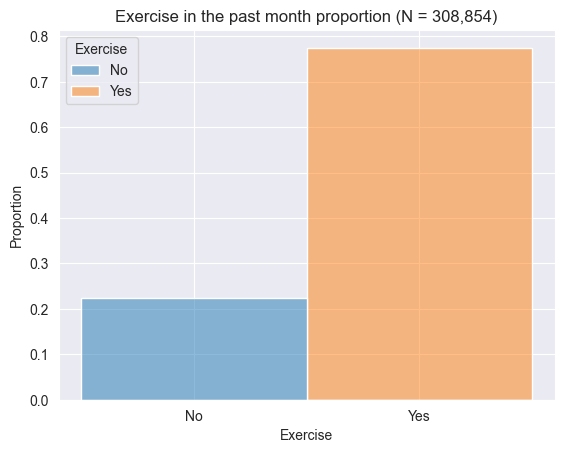

In [136]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Exercise", 
    hue = "Exercise",
    stat = 'proportion'
)
plt.title('Exercise in the past month proportion (N = 308,854)')
plt.show()

> About 80% of the sample reported that they were engaged in some exercise in the past month outside of their work. 

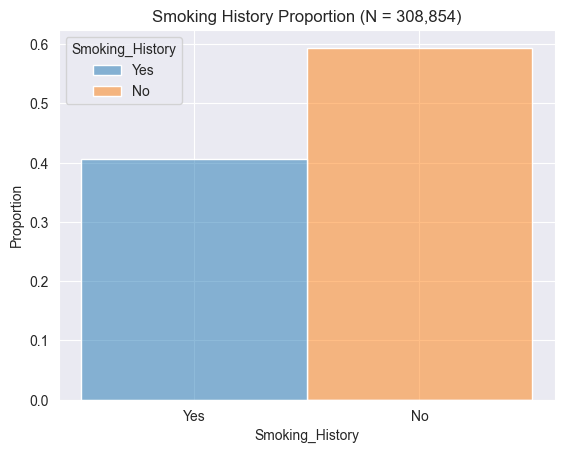

In [137]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Smoking_History", 
    hue = "Smoking_History",
    stat = "proportion")
plt.title("Smoking History Proportion (N = 308,854)")
plt.show()


> More individuals reported having NO smoking history (60%) than those with a smoking history. 

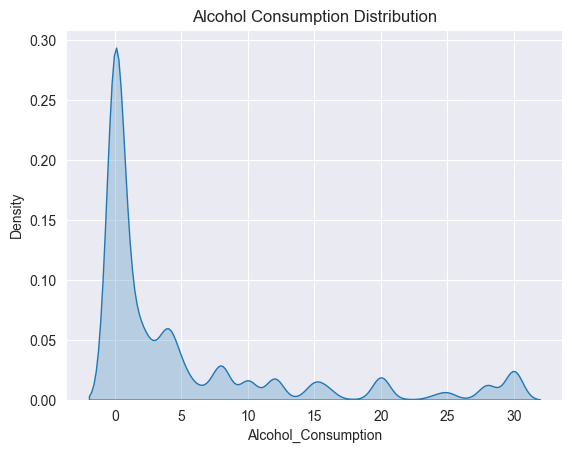

In [138]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Alcohol_Consumption",
    fill=True
)
plt.title("Alcohol Consumption Distribution")
plt.show()


> The data indicates most of the sample had relatively low alcohol consumption (less than 5 times per month), but the data spreadout from 0 to 30 times per month, and is highly right skewed. Therefore, we consider log transforming the data. 

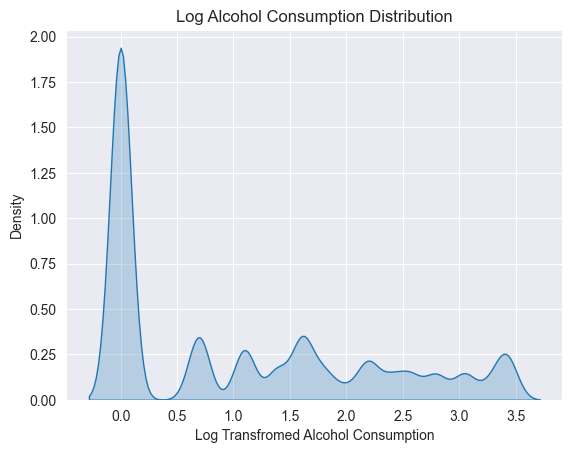

In [139]:
#Log transformed 
Alcohol_log = np.log(CVD_df['Alcohol_Consumption']+1)
sns.set_style("darkgrid")
sns.kdeplot(
    x=Alcohol_log,
    fill=True
)
plt.title("Log Alcohol Consumption Distribution")
plt.xlabel("Log Transfromed Alcohol Consumption")
plt.show()


> The log transformation doesnt seem to correct the skewness well, so we will consider encoding the data to an ordinal variable (categorize the consumption from never to heavy drinker).

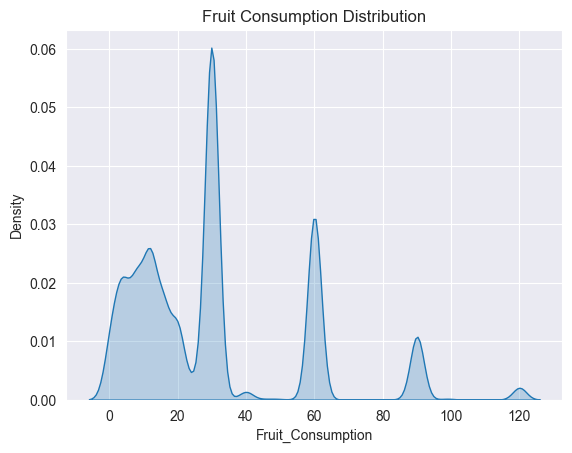

In [140]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Fruit_Consumption",
    fill=True
)
plt.title("Fruit Consumption Distribution")
plt.show()

> The fruit consumption data peaks around 10, 30, 60 and 90, and the large fraction is from 0 to 40. Most people in the sample had relatively low consumption of fruit, but the data varies a lot. Again, the right skew of the distribution may need log transformation. 

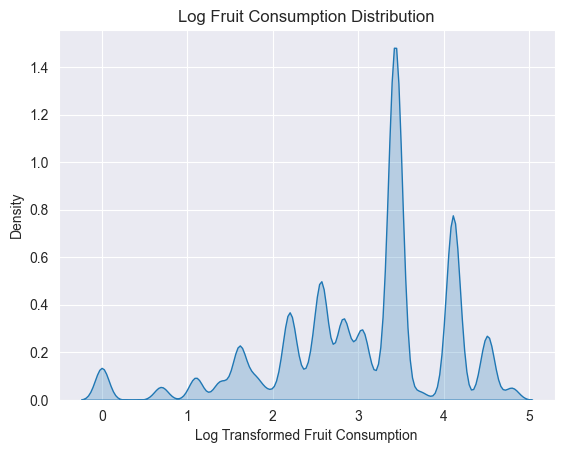

In [141]:
#Log transformed 
Fruit_log = np.log(CVD_df['Fruit_Consumption']+1)
sns.set_style("darkgrid")
sns.kdeplot(
    x=Fruit_log,
    fill=True
)
plt.title("Log Fruit Consumption Distribution")
plt.xlabel("Log Transformed Fruit Consumption")
plt.show()


> The log transformation doesnt make the data normally distributed, so we will consider other way transforming or encoding the data.

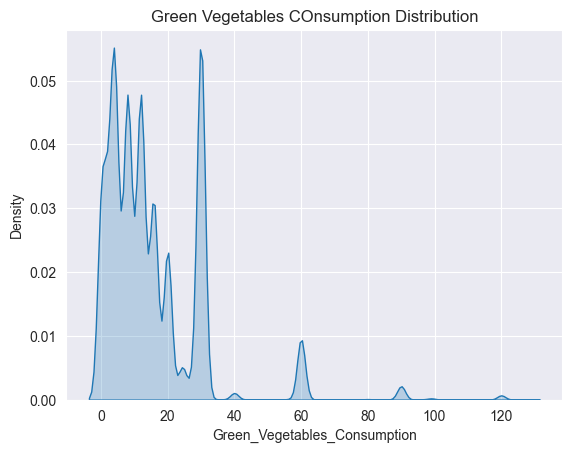

In [142]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Green_Vegetables_Consumption",
    fill=True
)
plt.title("Green Vegetables COnsumption Distribution")
plt.show()

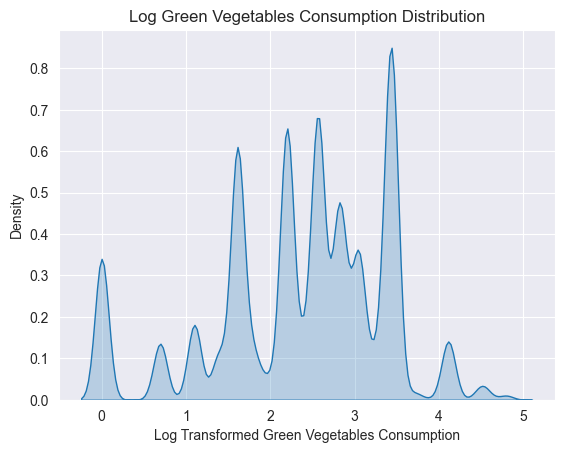

In [143]:
#Log transformed 
Green_Vege_log = np.log(CVD_df['Green_Vegetables_Consumption']+1)
sns.set_style("darkgrid")
sns.kdeplot(
    x=Green_Vege_log,
    fill=True
)
plt.title("Log Green Vegetables Consumption Distribution")
plt.xlabel("Log Transformed Green Vegetables Consumption")
plt.show()

> Similar to fruit consumption, the distribution of green vegetables consumption is highly skewed and the log transformation doesnt make it normally distributed. We will consider encoding the variable in another way. 

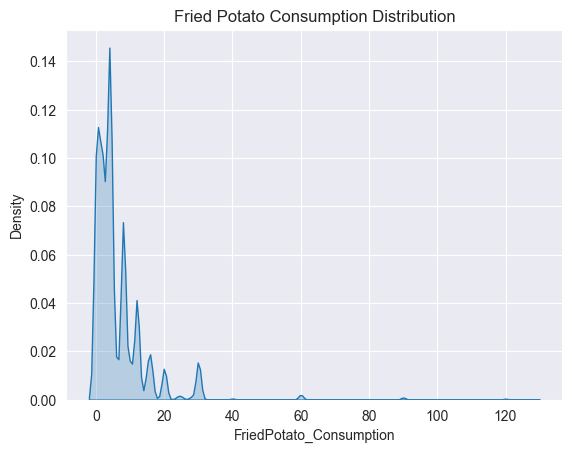

In [144]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="FriedPotato_Consumption", #np.log(CVD_df["FriedPotato_Consumption"]),
    fill=True
)

plt.title("Fried Potato Consumption Distribution")
plt.show()


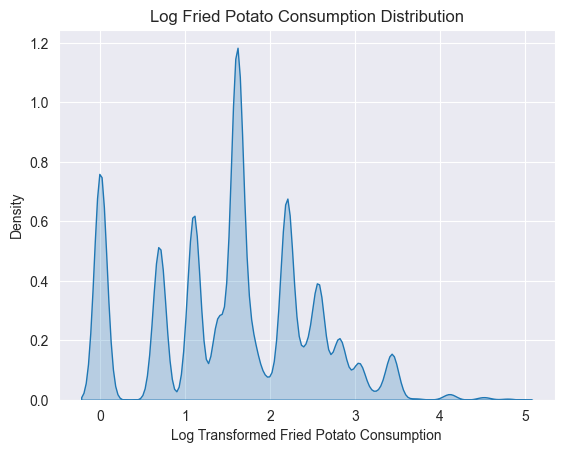

In [145]:
#Log transformed 
FriedPotato_log = np.log(CVD_df['FriedPotato_Consumption']+1)
sns.set_style("darkgrid")
sns.kdeplot(
    x=FriedPotato_log,
    fill=True
)
plt.title("Log Fried Potato Consumption Distribution")
plt.xlabel("Log Transformed Fried Potato Consumption")
plt.show()


> The right skewness of the data indicates the majority of the sample had fried potato at a low frequency. The log transformation cannot make the data normally distributed we therefore must consider a different kind of encoding. 

### Bivariate Exploratory Data Analysis

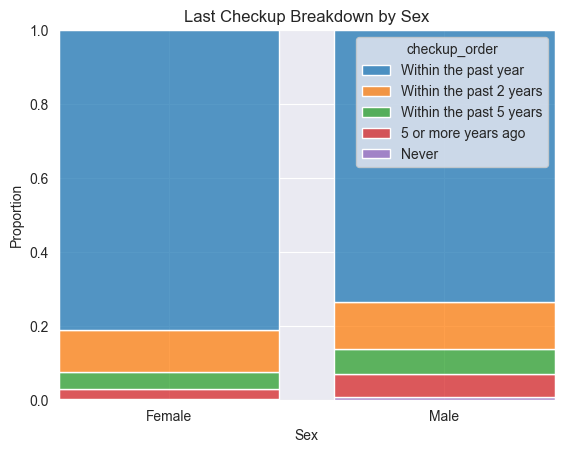

In [146]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "checkup_order",
    multiple="fill", 
    stat="proportion",
    discrete=True, shrink=.8)
plt.title("Last Checkup Breakdown by Sex")
plt.show()


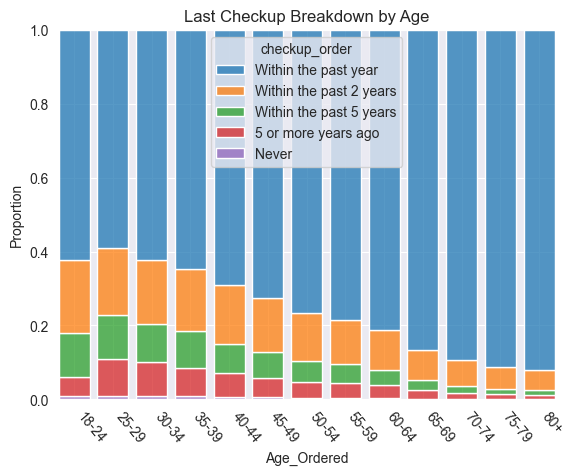

In [147]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "checkup_order",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Last Checkup Breakdown by Age")
plt.show()

> Higher proportions of recent doctoral checkups (meaning having a checkup in the past 1 or 2 years) was seen in females and older individuals than males and younger people, respectively. 

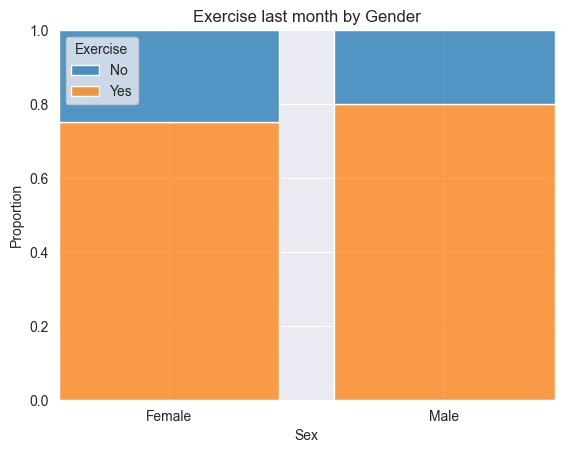

In [148]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Exercise",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Exercise last month by Gender")
plt.show()

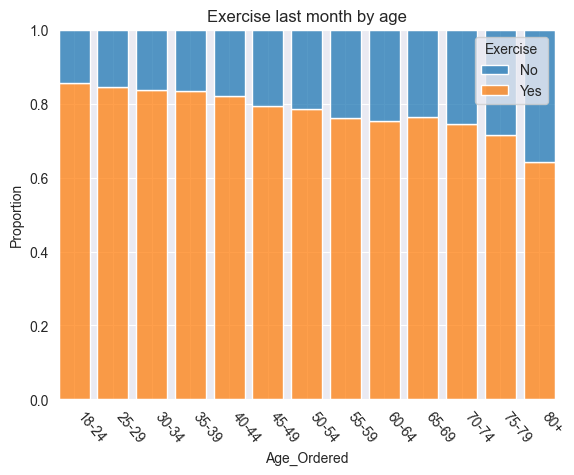

In [149]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Exercise",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Exercise last month by age")
plt.show()


> Males and younger people have slightly higher proportion of reporting having exercises outside of work last month. 

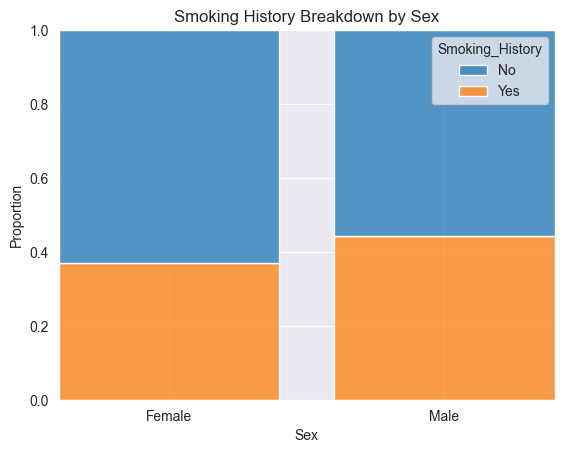

In [150]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Sex", 
    hue = "Smoking_History",
    hue_order =['No',"Yes"],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.title("Smoking History Breakdown by Sex")
plt.show()

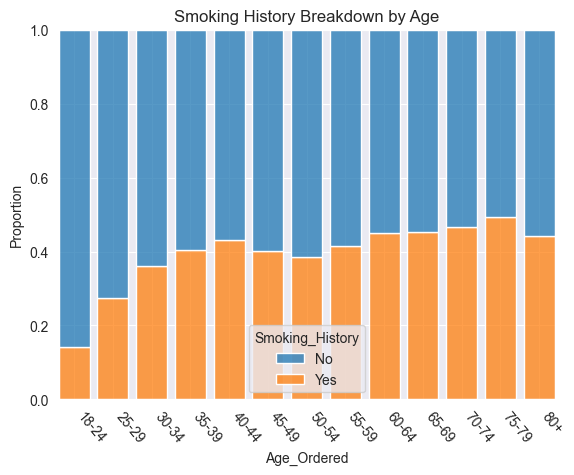

In [151]:
sns.set_style("darkgrid")
sns.histplot(
    data = CVD_df,
    x = "Age_Ordered", 
    hue = "Smoking_History",
    hue_order =['No',"Yes"],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.xticks(rotation = 310, ha = 'left')
plt.title("Smoking History Breakdown by Age")
plt.show()

> More males reported having a smoking history than females, and older individuals had a slightly higher proportion of smoking history. 

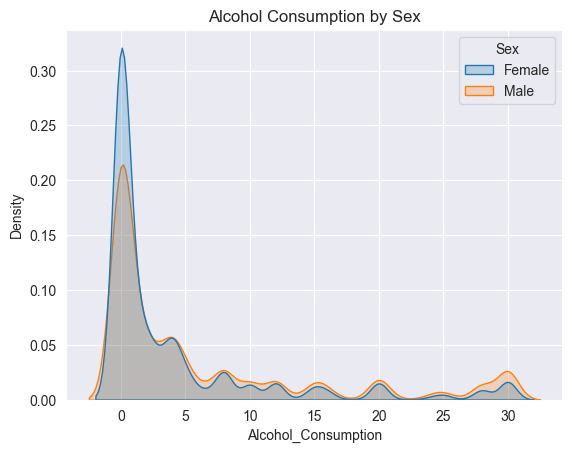

In [152]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Alcohol_Consumption",
    hue="Sex",
    fill=True,
    common_norm = False
)
plt.title("Alcohol Consumption by Sex")
plt.show()

> Females had a higher proportion of 0 alcohol consumption per month than males, who had a higher level of alcohol consumption in general. 

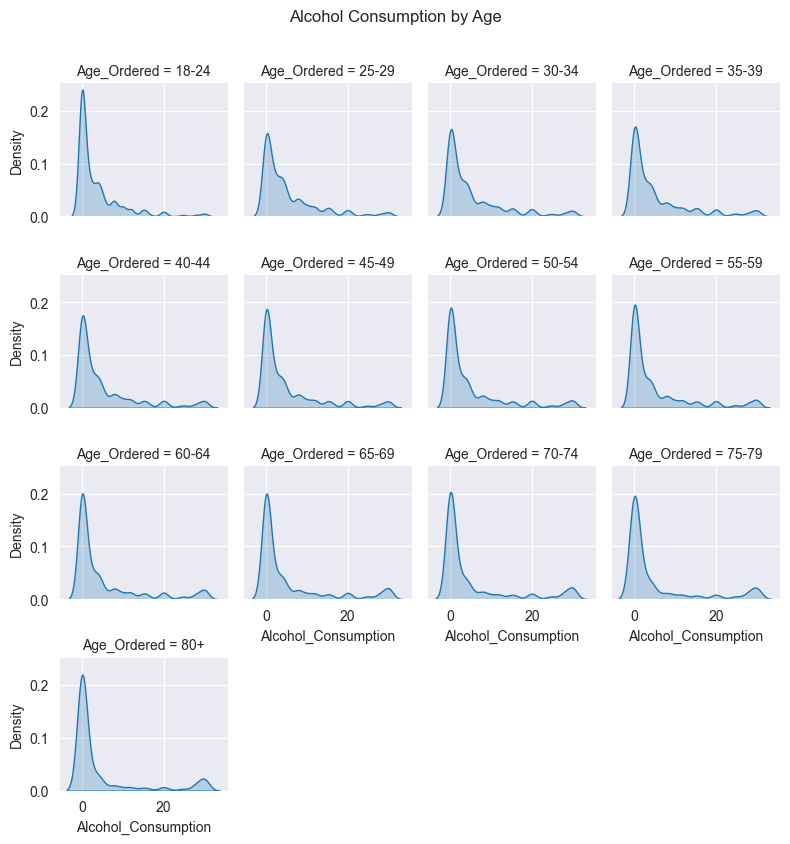

In [153]:
g = sns.FacetGrid(CVD_df, col="Age_Ordered", height=2, aspect=1, col_wrap =4)
g.map(sns.kdeplot, "Alcohol_Consumption", fill = True, common_norm = False)
g.fig.suptitle('Alcohol Consumption by Age',y = 1.05)
plt.show()

> Majority of the sample had low alcohol consumption, but the low consumption seemed to drop after 25 years until people getting old.

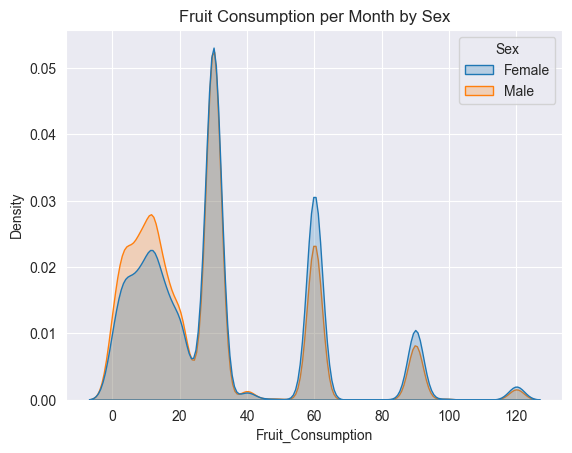

In [154]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Fruit_Consumption",
    hue="Sex",
    fill=True,
    common_norm = False
)
plt.title("Fruit Consumption per Month by Sex")
plt.show()

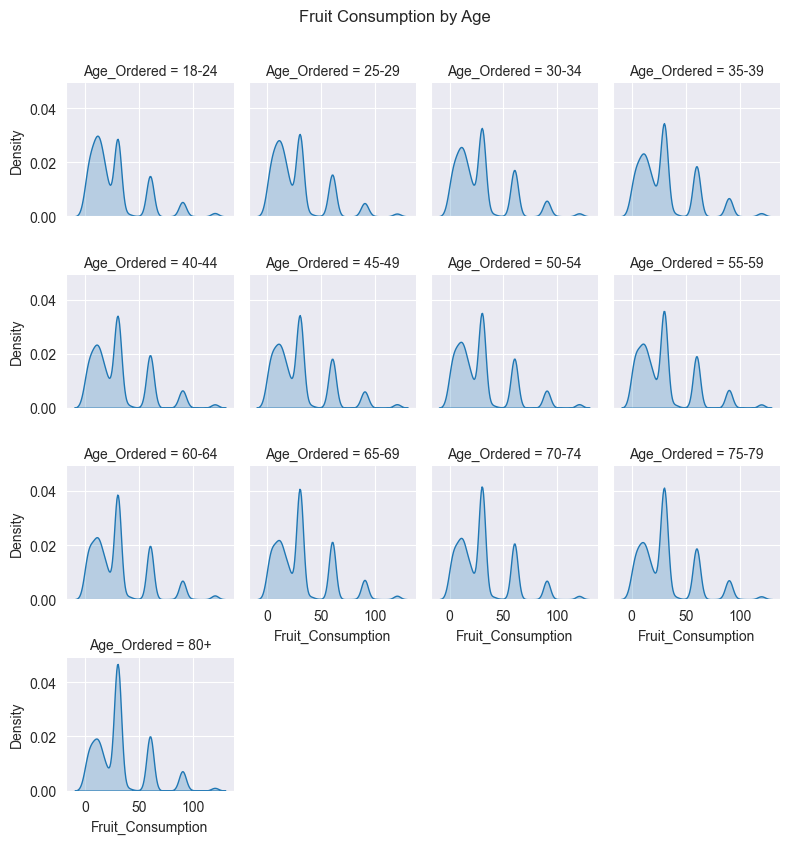

In [155]:
g = sns.FacetGrid(CVD_df, col="Age_Ordered", height=2, aspect=1, col_wrap =4)
g.map(sns.kdeplot, "Fruit_Consumption", fill = True, common_norm = False)
g.fig.suptitle('Fruit Consumption by Age',y = 1.05)
plt.show()

> Females and older people have a slightly higher consumption of fruit. 

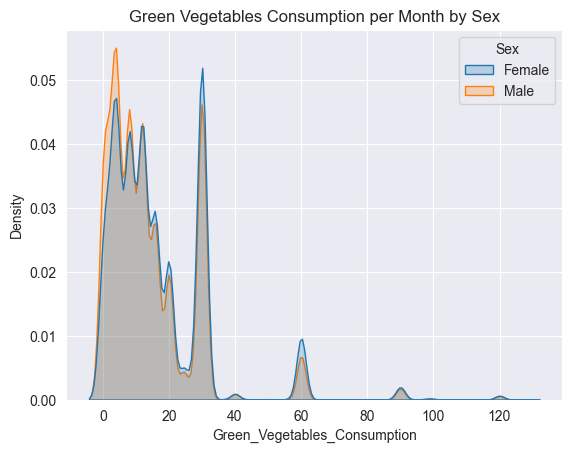

In [156]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="Green_Vegetables_Consumption",
    hue="Sex",
    fill=True,
    common_norm = False
)
plt.title("Green Vegetables Consumption per Month by Sex")
plt.show()

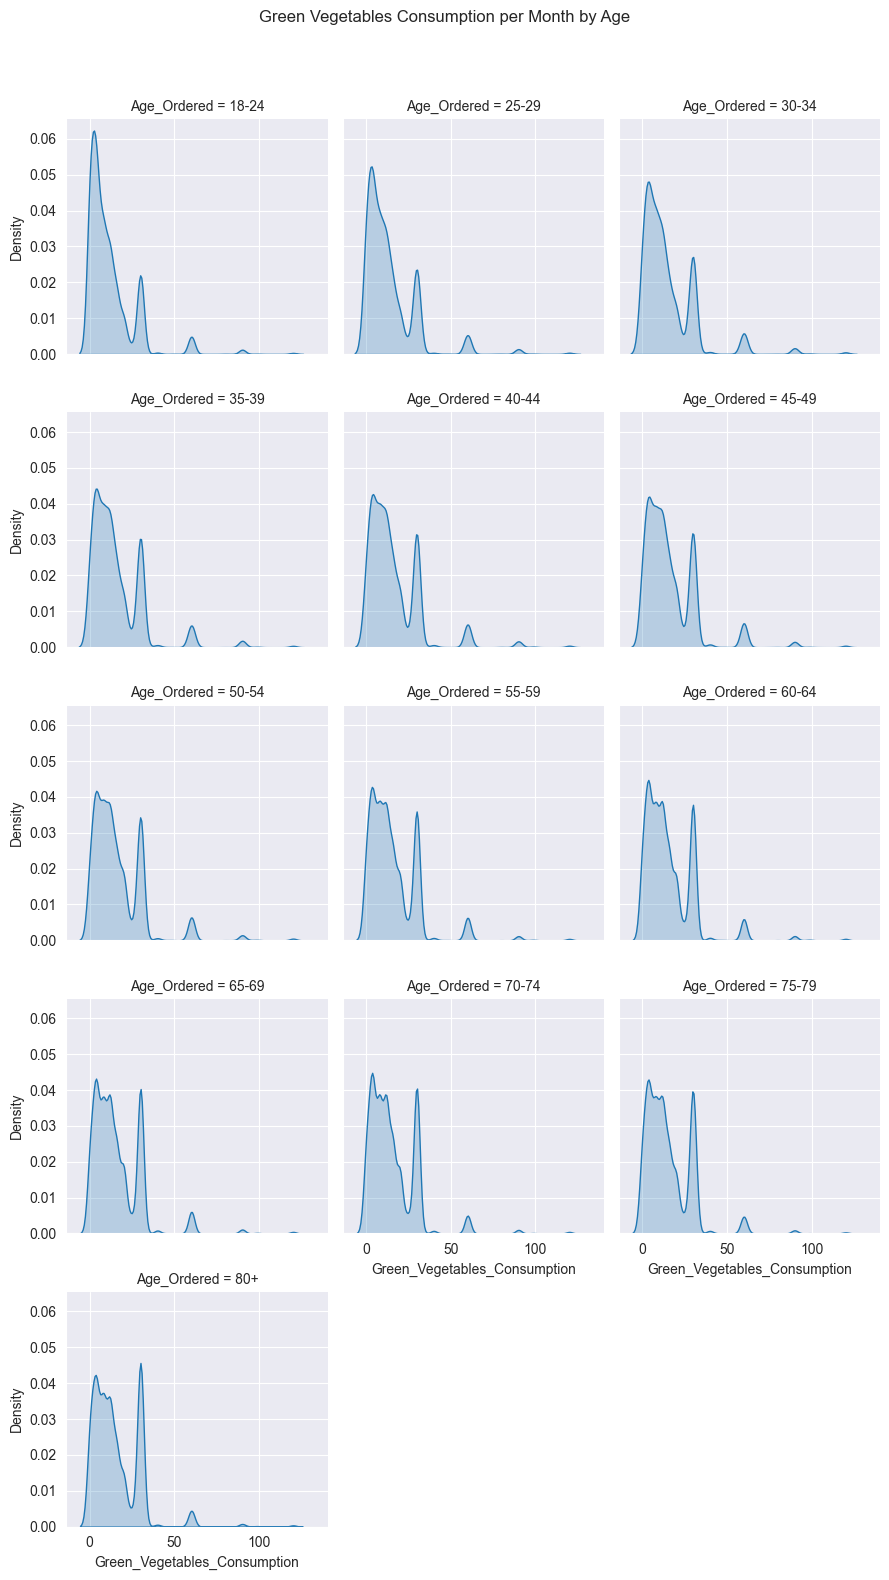

In [157]:
g = sns.FacetGrid(CVD_df, col="Age_Ordered", height=3, aspect=1, col_wrap =3)
g.map(sns.kdeplot, "Green_Vegetables_Consumption", fill = True, common_norm = False)
g.fig.suptitle('Green Vegetables Consumption per Month by Age',y = 1.05)
plt.show()

> Similar to fruit consumption, females and older people have slightly higher consumption of green vegetables than males and younger people, separately. 

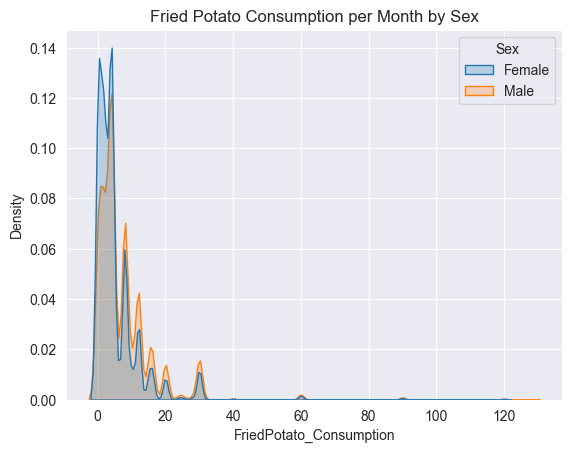

In [158]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="FriedPotato_Consumption",
    hue="Sex",
    fill=True,
    common_norm = False
)
plt.title("Fried Potato Consumption per Month by Sex")
plt.show()

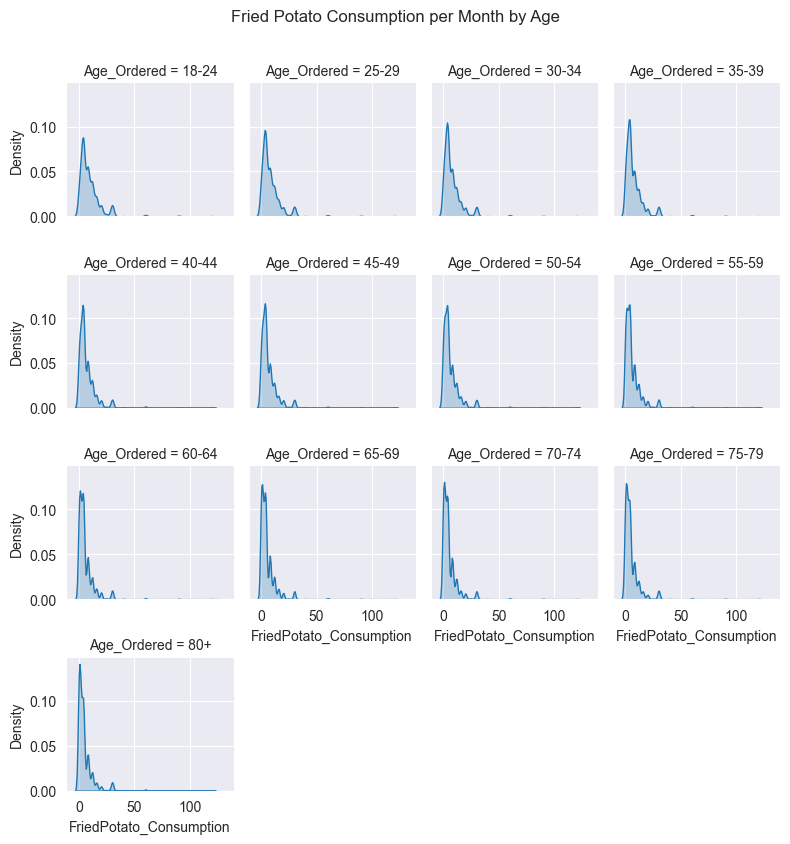

In [159]:
g = sns.FacetGrid(CVD_df, col="Age_Ordered", height=2, aspect=1, col_wrap =4)
g.map(sns.kdeplot, "FriedPotato_Consumption", fill = True, common_norm = False)
g.fig.suptitle('Fried Potato Consumption per Month by Age',y = 1.05)
plt.show()

> Female and older people have less fried potato and males and younger people, respectively. 

> The general trends of each lifestyle variables look similar across different age groups and gender, but slight differences were seen. Except exercise, females and older people seem to have a healthier lifestyle than males and younger people, because females and older people had higher proportion of recent doctoral checkup, less consumption of alcohol and fried potato, and more consumption of fruit and vegetables. 

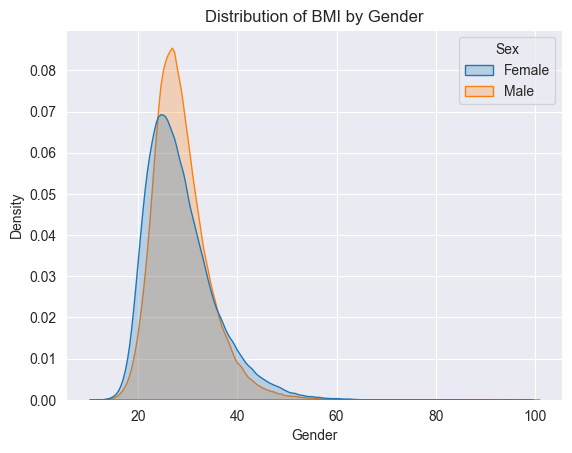

In [160]:
sns.set_style("darkgrid")
sns.kdeplot(
    data=CVD_df,
    x="BMI",
    hue="Sex",
    fill=True,
    common_norm = False
)
plt.title("Distribution of BMI by Gender")
plt.xlabel("Gender")
plt.show()

> Males on balance have slightly higher BMIs than women. 

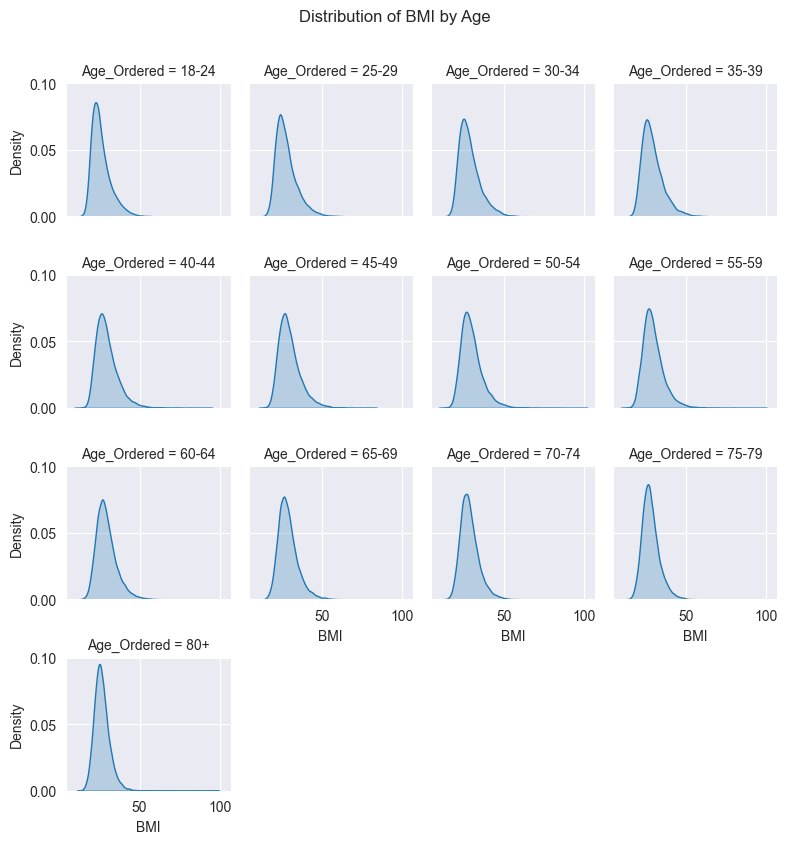

In [161]:
g = sns.FacetGrid(CVD_df, col="Age_Ordered", height=2, aspect=1, col_wrap =4)
g.map(sns.kdeplot, "BMI", fill = True, common_norm = False)
g.fig.suptitle('Distribution of BMI by Age',y = 1.05)
plt.show()

### Multivariate Exploratory Data Analysis

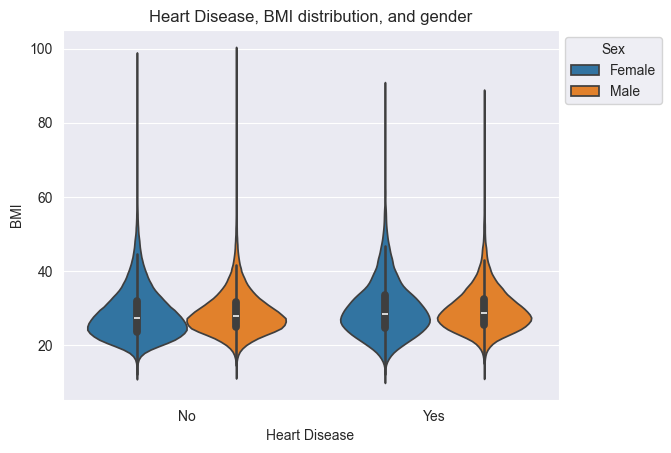

In [162]:
sns.set_style("darkgrid")
plt.plot(size = [8,25])
bmi_age = sns.violinplot(data=CVD_df, x="Heart_Disease", y="BMI", hue = 'Sex')
sns.move_legend(bmi_age, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Heart Disease")
plt.title("Heart Disease, BMI distribution, and gender")
plt.show()

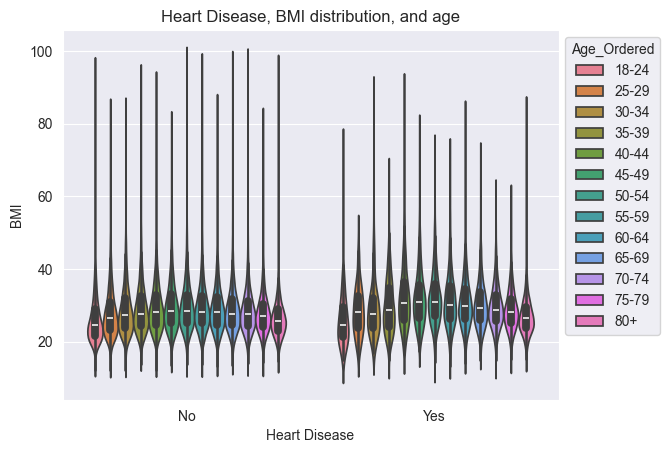

In [163]:
sns.set_style("darkgrid")
plt.plot(size = [8,25])
bmi_age = sns.violinplot(data=CVD_df, x="Heart_Disease", y="BMI", hue = 'Age_Ordered')
sns.move_legend(bmi_age, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Heart Disease")
plt.title("Heart Disease, BMI distribution, and age")
plt.show()

> The distribution doesn't seem to vary much for gender by heart disease plot, but when breaking down by age, those having heart disease, especially the younger ones, seem to have higher BMI than their peers who do not have heart disease. So BMI may be more predictive for younger patients than order ones.

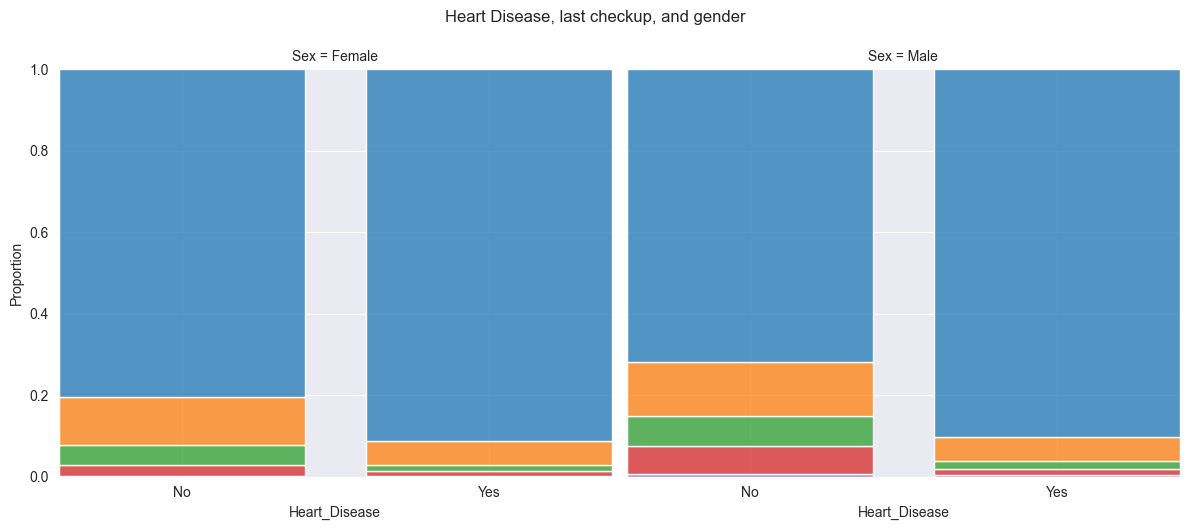

In [164]:
g = sns.FacetGrid(CVD_df, col = 'Sex', height=5, aspect=1.2)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "checkup_order",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease, last checkup, and gender',y = 1.05)
plt.show()

> As observed previously, having heart disease is related to higher proportion of having a doctoral checkup within the last 1 or 2 years. Males who do not have heart disease had the lowest proportion of checkup in the past 2 years. 

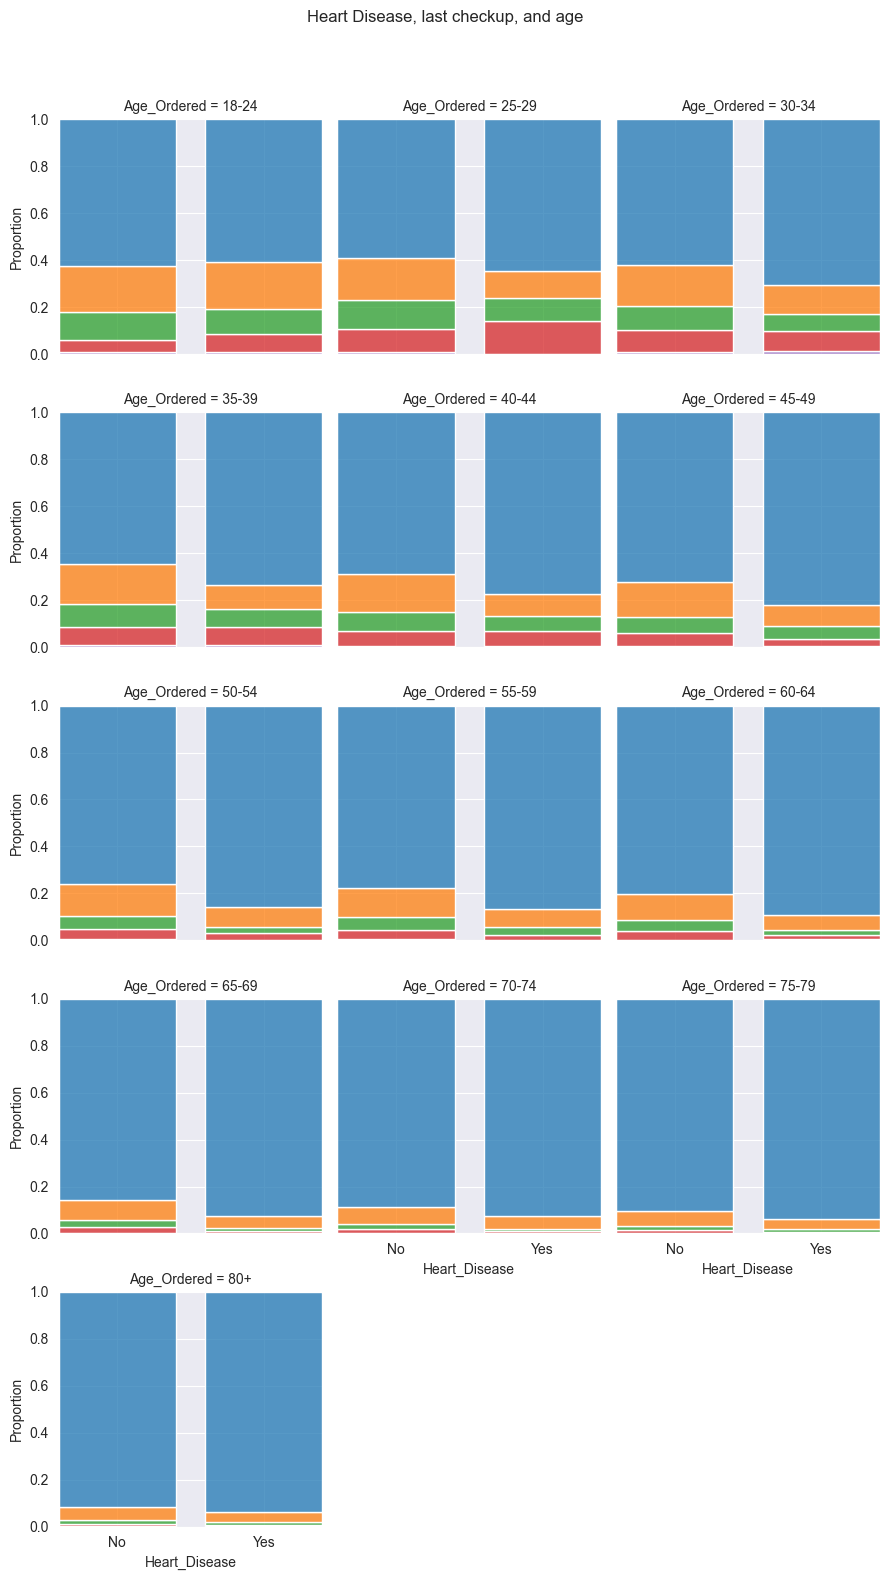

In [165]:
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', col_wrap = 3, height=3, aspect=1)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "checkup_order",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease, last checkup, and age',y = 1.05)
plt.show()

> Across age groups, those reported having heart disease have higher proportion of recent doctoral checkup than those who reported not having heart disease. This means the higher recent checkup proportion in heart disease may not relate to higher proportion of older people in the sample. We suspect that maybe it is the recent checkup made individuals aware of their heart disease, and those who didn't checkup in the past 1 or 2 years may have heart disease but haven't been diagnosed. 

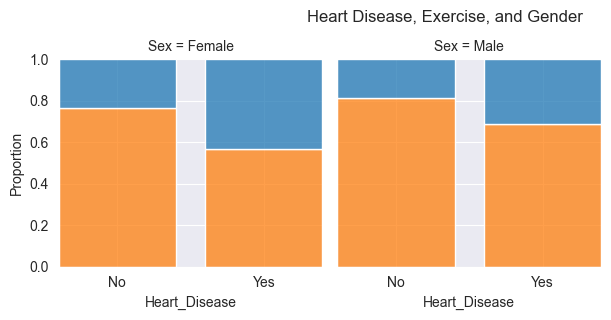

In [166]:
g = sns.FacetGrid(CVD_df, col = 'Sex', col_wrap = 3, height=3, aspect=1)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Exercise",
    hue_order = ["No", "Yes"],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease, Exercise, and Gender',y = 1.05)
plt.show()

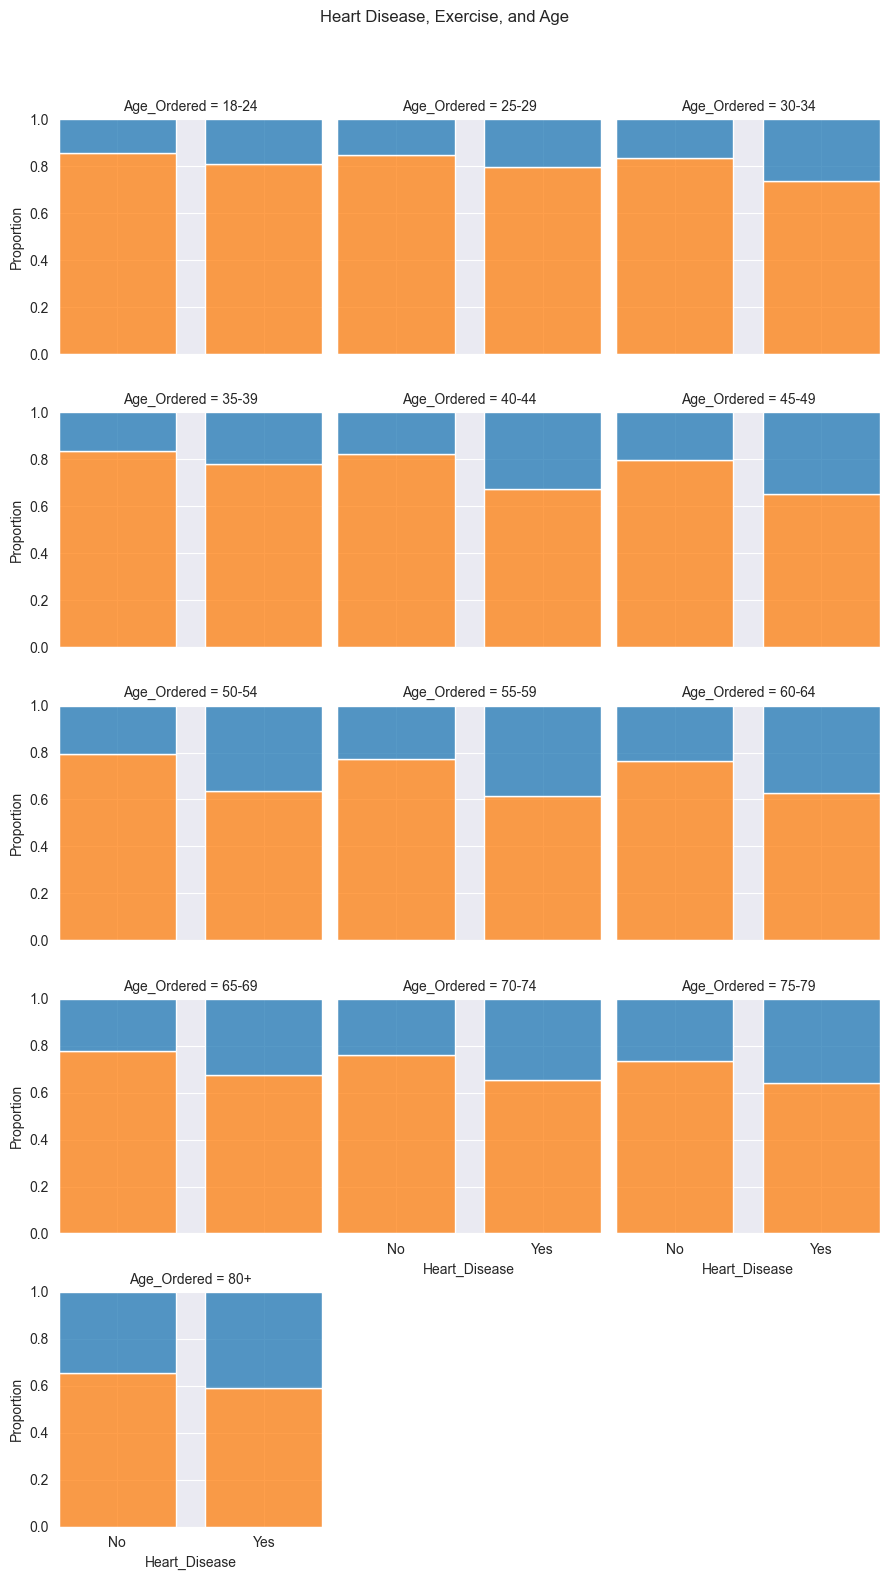

In [167]:
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', col_wrap = 3, height=3, aspect=1)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Exercise",
    hue_order = ["No", "Yes"],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease, Exercise, and Age',y = 1.05)
plt.show()

> Those without heart disease seem more likely to be engaged in exercise, and this pattern doesn't vary much across gender and age.

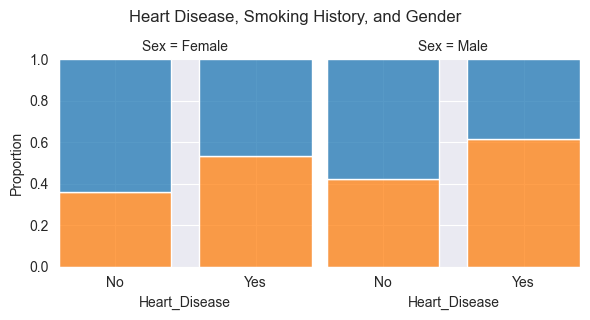

In [168]:
g = sns.FacetGrid(CVD_df, col = 'Sex', height=3, aspect=1)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Smoking_History",
    hue_order = ["No", "Yes"],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease, Smoking History, and Gender',y = 1.05)
plt.show()

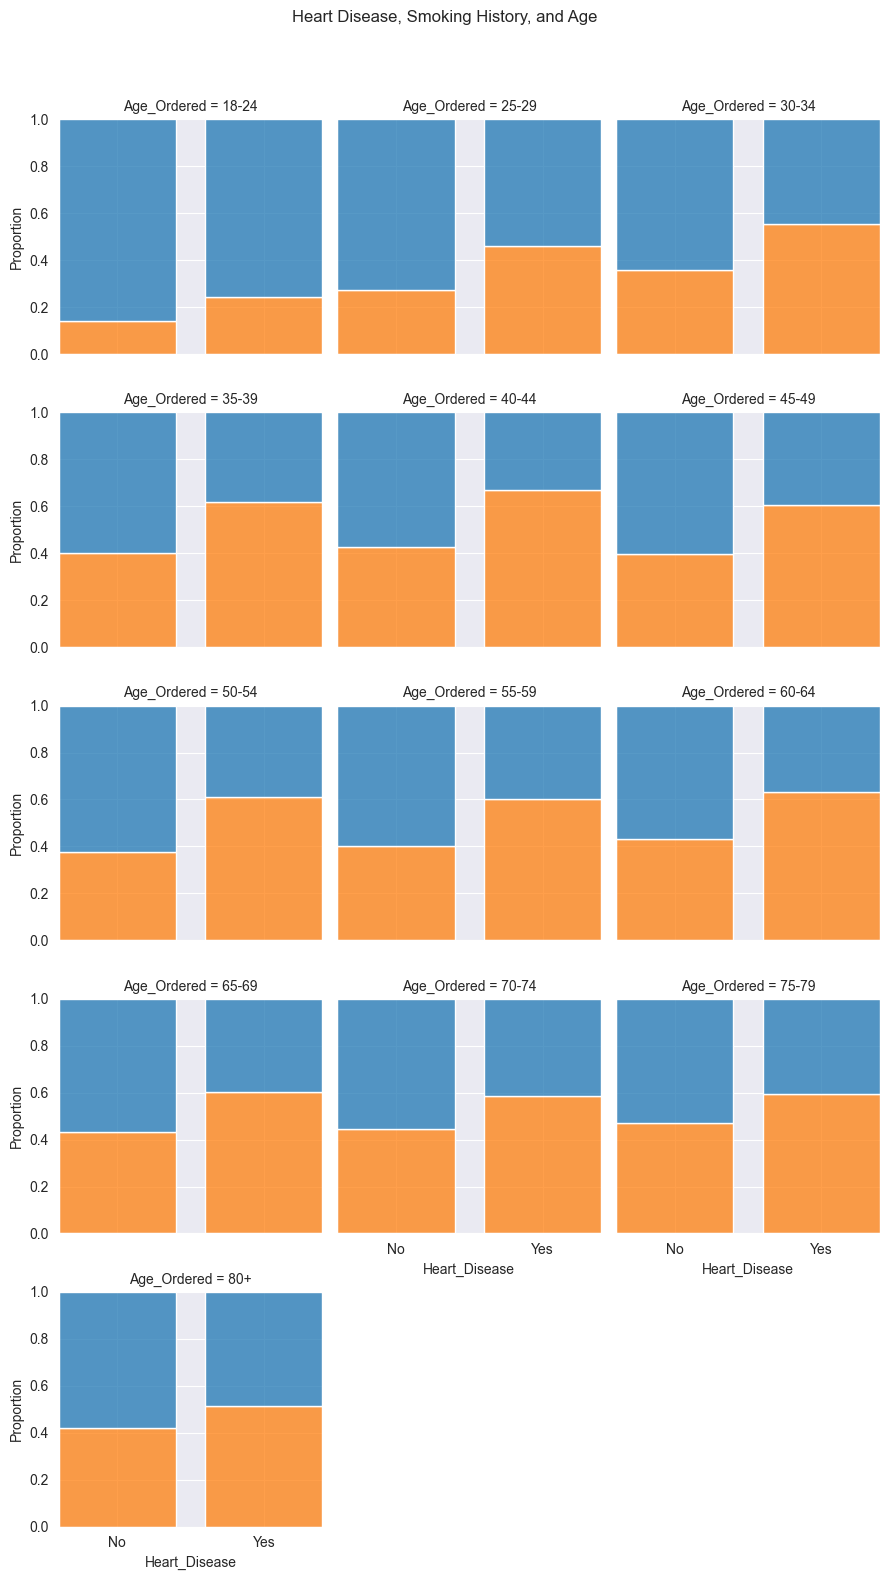

In [169]:
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', col_wrap = 3, height=3, aspect=1)
g = (g.map_dataframe(sns.histplot, x = "Heart_Disease", 
    hue = "Smoking_History",
    hue_order = ["No", "Yes"],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8))
g.fig.suptitle('Heart Disease, Smoking History, and Age',y = 1.05)
plt.show()

> Having heart disease is related to a higher proportion of having smoking history than those without heart disease. This trend is the same for both gender and various age groups, but the most dramatic effect was seen for people aged from 25 to 69 from the plot. 

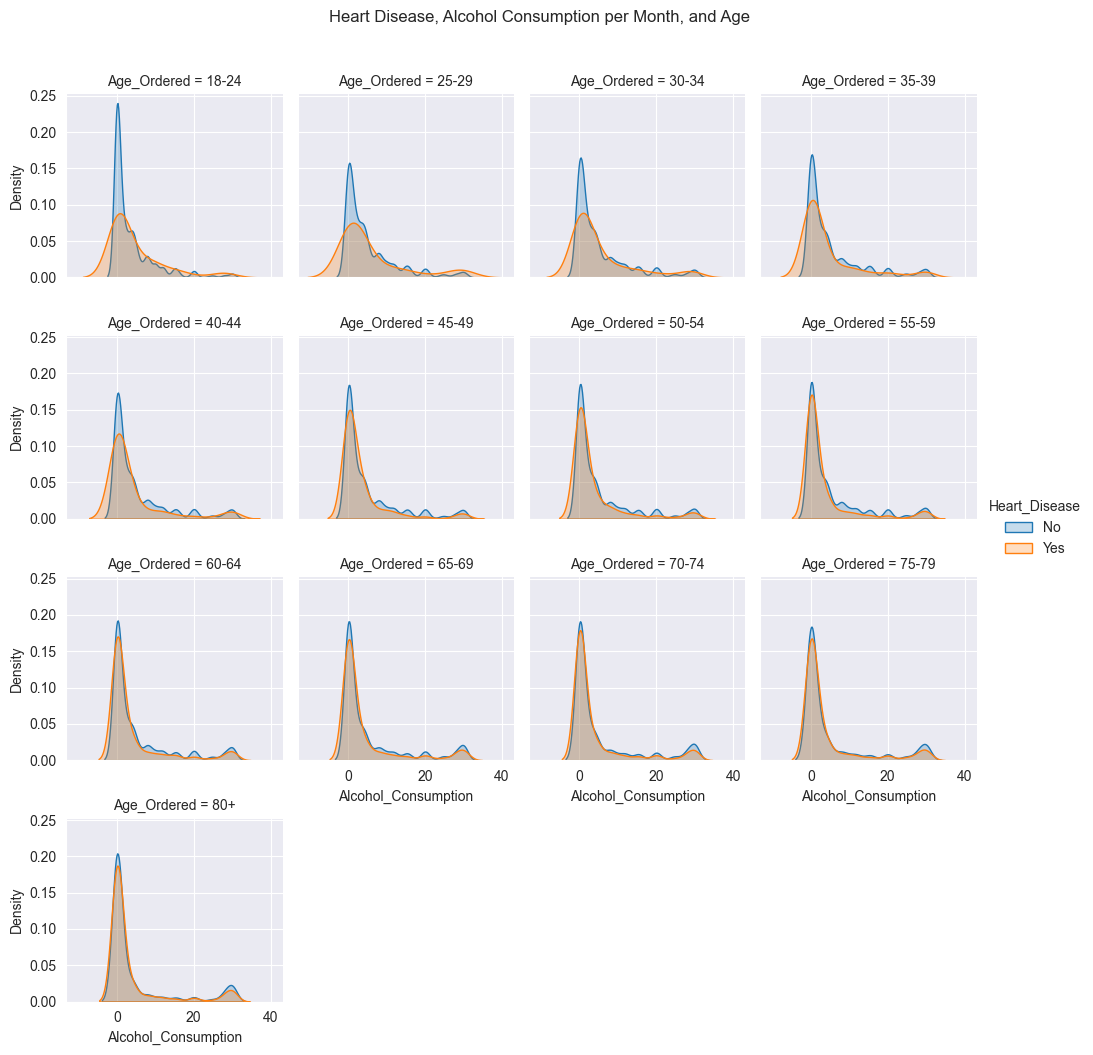

In [170]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', hue = "Heart_Disease", hue_order = ['No',"Yes"],height=2.5, col_wrap = 4)
g = (g.map_dataframe(sns.kdeplot,
    x="Alcohol_Consumption",
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease, Alcohol Consumption per Month, and Age',y = 1.05)
plt.show()

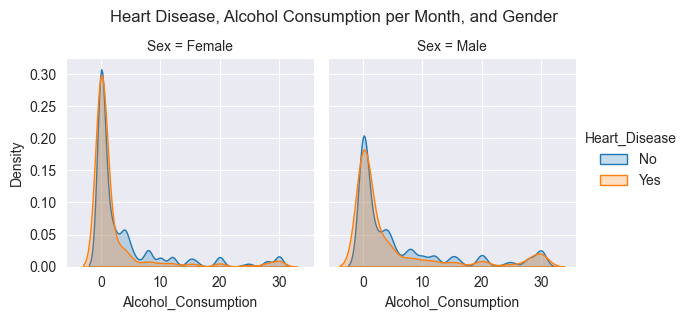

In [171]:

sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Sex', hue = "Heart_Disease", hue_order = ['No',"Yes"])
g = (g.map_dataframe(sns.kdeplot,
    x="Alcohol_Consumption",
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease, Alcohol Consumption per Month, and Gender',y = 1.05)
plt.show()


> In general, those having heart disease are less likely to have low alcohol consumption, but the difference between patients and non-patients regarding low alcohol consumption is stronger at younger ages than older ages, and strong for male than females. Therefore, alcohol consumption may be a stronger risk factor for heart disease in young people and males. 

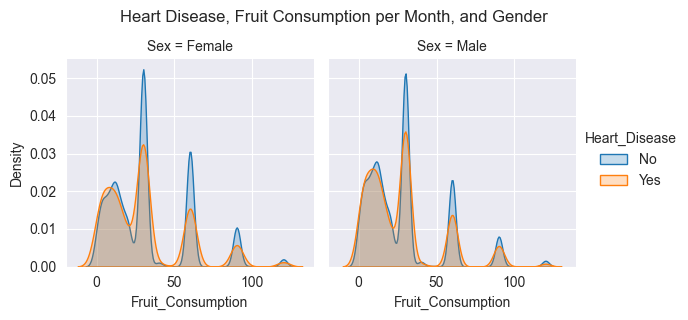

In [172]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Sex', hue = "Heart_Disease", hue_order = ['No',"Yes"])
g = (g.map_dataframe(sns.kdeplot,
    x="Fruit_Consumption",
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease, Fruit Consumption per Month, and Gender',y = 1.05)
plt.show()

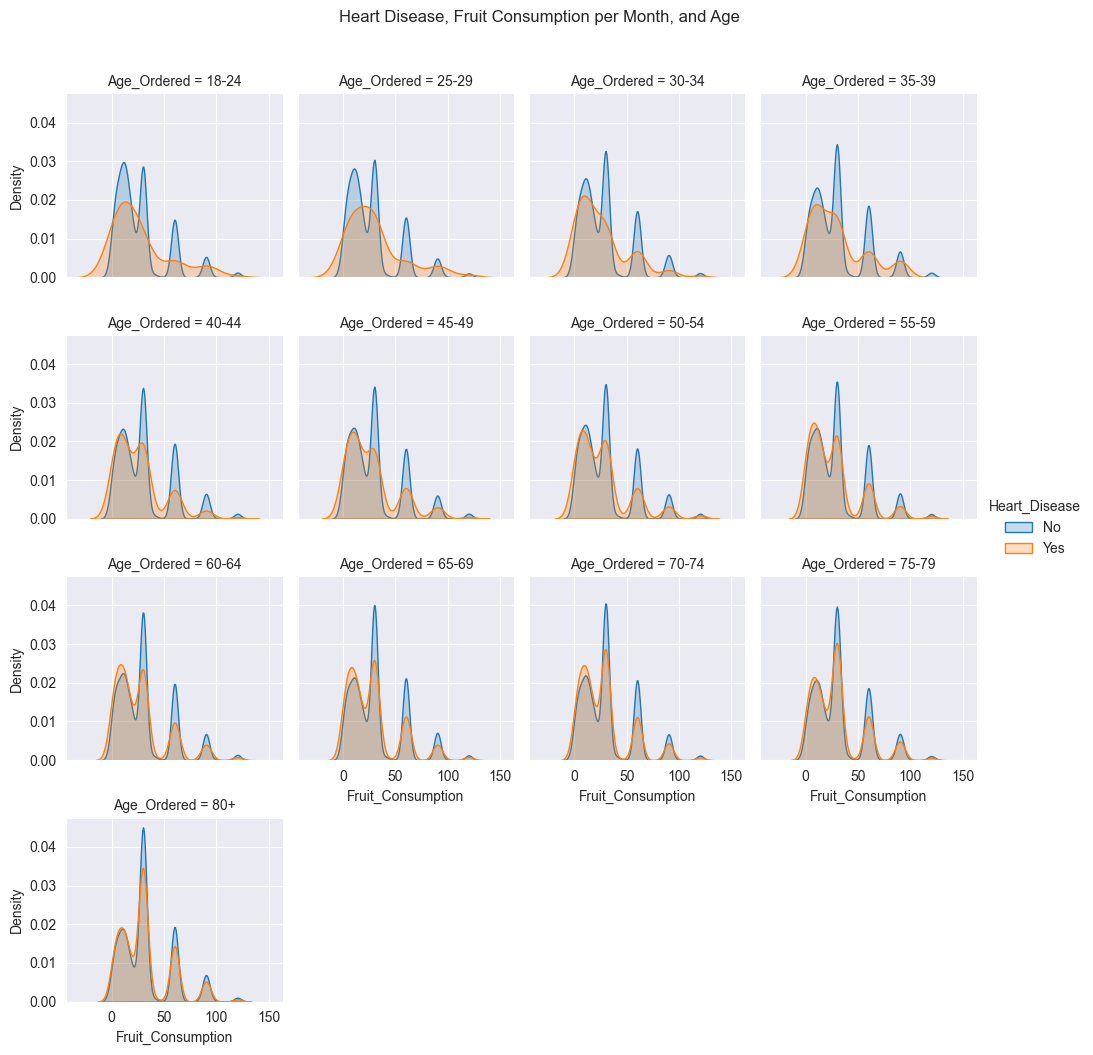

In [173]:

sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', hue = "Heart_Disease", hue_order = ['No',"Yes"],height=2.5, col_wrap = 4)
g = (g.map_dataframe(sns.kdeplot,
    x="Fruit_Consumption",
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease, Fruit Consumption per Month, and Age',y = 1.05)
plt.show()

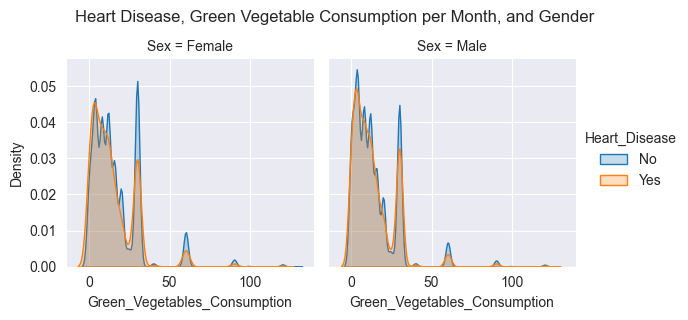

In [174]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Sex', hue = "Heart_Disease", hue_order = ['No',"Yes"])
g = (g.map_dataframe(sns.kdeplot,
    x="Green_Vegetables_Consumption",
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease, Green Vegetable Consumption per Month, and Gender',y = 1.05)
plt.show()

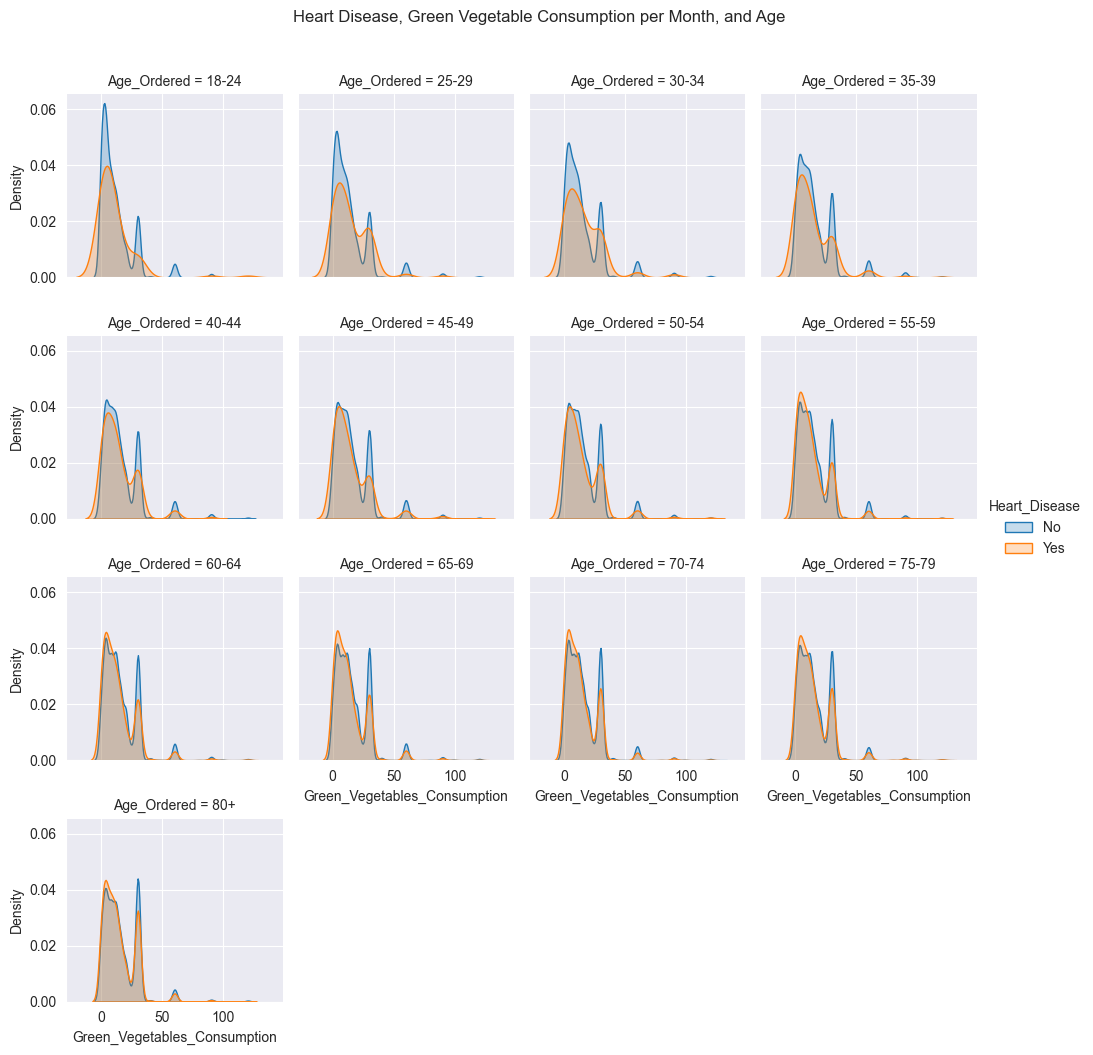

In [175]:
sns.set_style("darkgrid")
g = sns.FacetGrid(CVD_df, col = 'Age_Ordered', hue = "Heart_Disease", hue_order = ['No',"Yes"],height=2.5, col_wrap = 4)
g = (g.map_dataframe(sns.kdeplot,
    x="Green_Vegetables_Consumption",
    fill=True,
    common_norm = False))
g.add_legend()
g.fig.suptitle('Heart Disease, Green Vegetable Consumption per Month, and Age',y = 1.05)
plt.show()


### Modeling

> Modelling using neural networks was explored, but ultimately yielded marginal performance improvements that were not worth the additional computational complexity and training time required to build a performant model.

In [ ]:
# neural network
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics as tm

class DenseNN(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.model = nn.Sequential(
            nn.Linear(in_features=26, out_features=640),
            nn.LeakyReLU(), #nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(in_features=640, out_features=640),
            nn.LeakyReLU(), #nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(in_features=640, out_features=640),
            nn.LeakyReLU(), #nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(in_features=640, out_features=640),
            nn.LeakyReLU(), #nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(in_features=640, out_features=640),
            nn.LeakyReLU(), #nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(in_features=640, out_features=640),
            nn.LeakyReLU(), #nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(in_features=640, out_features=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
dnn = DenseNN()

criterion = nn.BCELoss()
optimizer = optim.Adam(dnn.parameters(), lr=1e-4,) #betas=(0.8,0.888))
epochs = 250

auc_list = []
acc_trn_list = []
acc_val_list = []
loss_list =[]

sss = StratifiedShuffleSplit(n_splits=20, test_size=.2)

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    val_preds = torch.tensor([])
    val_labels = torch.tensor([])

    for i, (train_index, val_index) in enumerate(sss.split(X_train, y_train)):
        inputs, labels = X_train.iloc[train_index, :], y_train.iloc[train_index].to_numpy().reshape((-1,1))
        inputs, labels = torch.tensor(df_mapper.fit_transform(inputs)).to(torch.float32), torch.tensor(labels).type(torch.float32)
        
        dnn.train()
        outputs = dnn(inputs)

        optimizer.zero_grad()

        weights = [labels.size(0) / (2 * (labels.size(0)-labels.sum())), labels.size(0) / (2 * labels.sum())]
        criterion.weight = torch.stack(list(map(lambda x: weights[int(x)], labels))).reshape((-1,1))
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        total += labels.size(0)
        correct += (outputs.round() == labels).sum().item()

        with torch.no_grad():
            inputs, labels = X_train.iloc[val_index, :], y_train.iloc[val_index].to_numpy().reshape((-1,1))
            inputs, labels = torch.tensor(df_mapper.transform(inputs)).to(torch.float32), torch.tensor(labels).type(torch.float32)
            
            dnn.eval()
            outputs = dnn(inputs)
            predicted = outputs.data.round()

            val_preds = torch.cat((val_preds, predicted), 0)
            val_labels = torch.cat((val_labels, labels), 0)
        
    
    auc_list.append(tm.functional.classification.binary_auroc(val_preds, val_labels.type(torch.LongTensor)))
    acc_val_list.append(tm.functional.accuracy(val_preds, val_labels, task='binary'))
    loss_list.append(running_loss/len(X_train))
    acc_trn_list.append(correct/total)

    if ((epoch+1) % 10) == 0:
        print(f"Epoch {epoch+1}: \n* Loss = {loss_list[-1]}\n* Train Accuracy = {acc_trn_list[-1]}\n* Validation Accuracy = {acc_val_list[-1]}\n* AUROC = {auc_list[-1]}\n")

In [ ]:
df_mapper.fit(X_train)
with torch.no_grad():
    inputs, labels = X_test, y_test.to_numpy().reshape((-1,1))
    inputs, labels = torch.tensor(df_mapper.transform(inputs)).to(torch.float32), torch.tensor(labels).type(torch.float32)
    
    outputs = dnn(inputs)
    y_pred = outputs.data.round()

    test_auroc = tm.functional.classification.binary_auroc(y_pred, labels.type(torch.LongTensor))
    test_acc = tm.functional.accuracy(y_pred, labels, task='binary')

print(f'Model achieves testing performance of: AUROC = {test_auroc}, Accuracy = {test_acc}')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0c8451d-bde1-48e2-8327-d855b409b3cd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>